In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

In [21]:
# The aggregated data
data = pd.read_csv("Data/merged_dataset.csv")
# Use the cubehelix palette for the char
# Use the specified cubehelix palette as a colormap for the chart
palette = sns.cubehelix_palette(start=0.5, rot=-0.5, as_cmap=True)

In [3]:
emotion_columns = ["I felt bored", "I felt satisfied", "I felt annoyed", "I felt curious"]

In [4]:
# Step 4: Aggregate the Data (Mean per Participant for Each Emotion)
aggregated_per_participant = data.groupby("Participant ID")[emotion_columns].mean()

In [5]:
# Step 4: Melt the Aggregated Data for Visualization
aggregated_melted = aggregated_per_participant.reset_index().melt(
    id_vars=["Participant ID"], value_vars=emotion_columns, var_name="Emotion", value_name="Score"
)

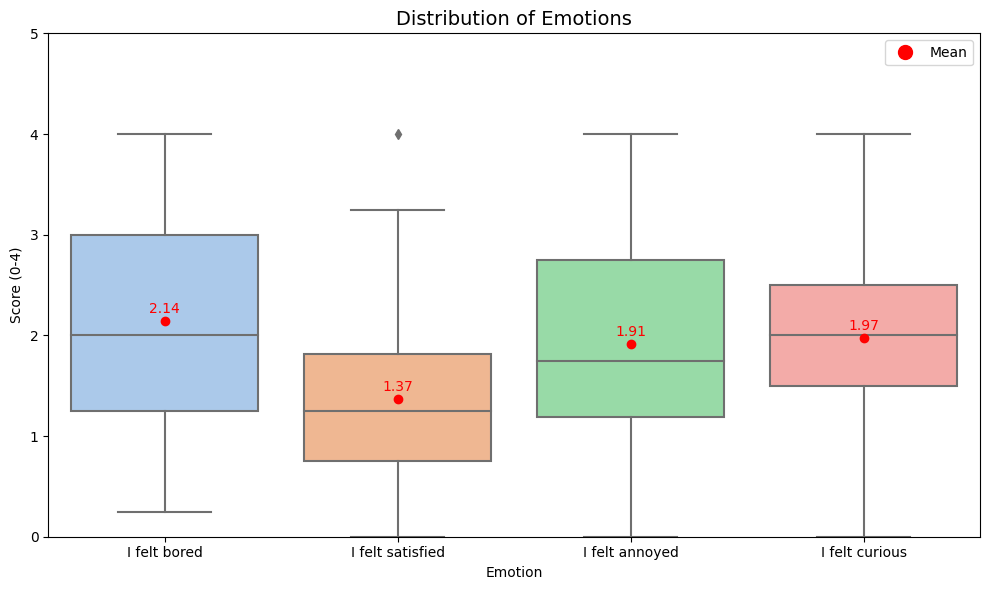

In [6]:
# Recalculate the means to ensure they are properly defined
mean_values_actual = aggregated_melted.groupby("Emotion")["Score"].mean()

# Reorder the mean values to match the boxplot's order
boxplot_order = aggregated_melted["Emotion"].unique()  # Order of emotions in the boxplot
mean_values_corrected = mean_values_actual.reindex(boxplot_order)

# Plot the corrected boxplot with proper mean value alignment
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=aggregated_melted,
    x="Emotion",
    y="Score",
    palette="pastel",
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"},
)

# Annotate mean values on the plot with corrected alignment
for i, mean in enumerate(mean_values_corrected):
    plt.text(
        i, mean + 0.05,  # Place slightly above the dot
        f"{mean:.2f}",  # Format mean value to 2 decimal places
        color="red",
        ha="center",  # Center-align horizontally
        va="bottom",  # Vertically align just above the red dot
        fontsize=10,
    )

# Add a legend for the red dot (mean)
red_dot = plt.Line2D([], [], color="red", marker="o", linestyle="None", markersize=10, label="Mean")
plt.legend(handles=[red_dot], loc="upper right")

# Add labels and title
plt.title("Distribution of Emotions", fontsize=14)
plt.xlabel("Emotion")
plt.ylabel("Score (0-4)")
plt.ylim(0, 5)  # Assuming the scale is 0-4
plt.tight_layout()
plt.show()

# Emotion vs Control

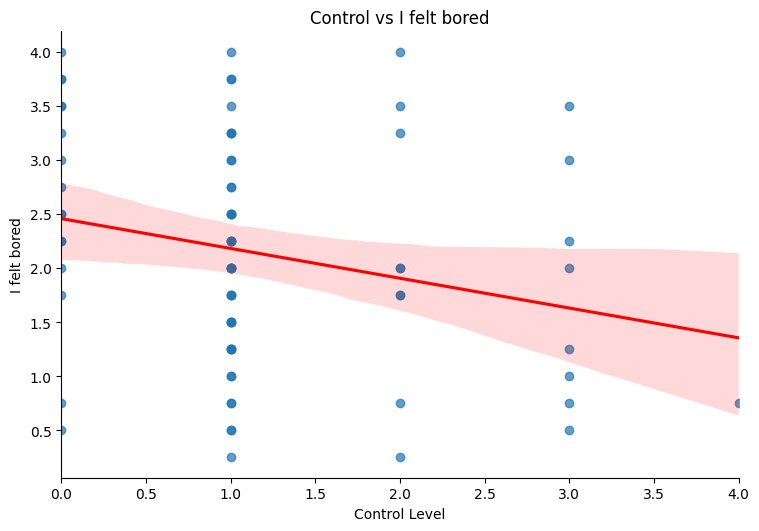

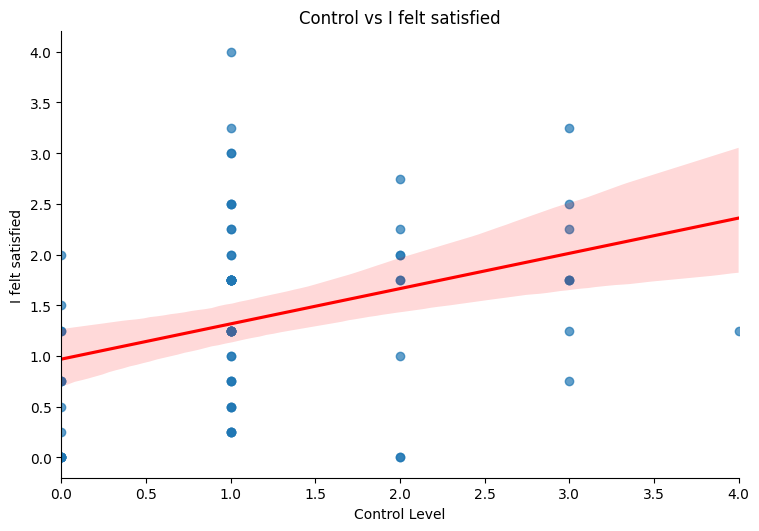

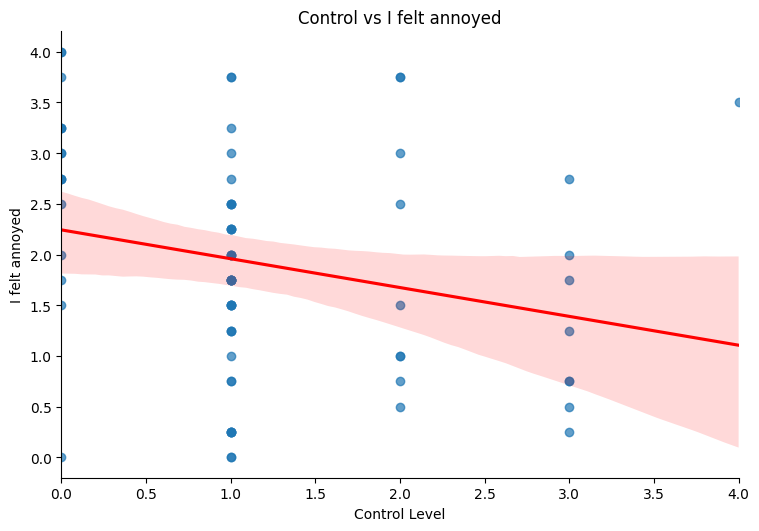

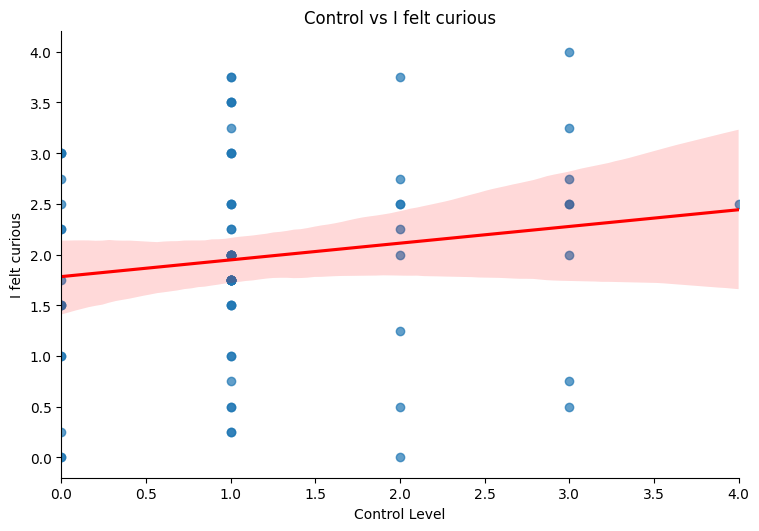

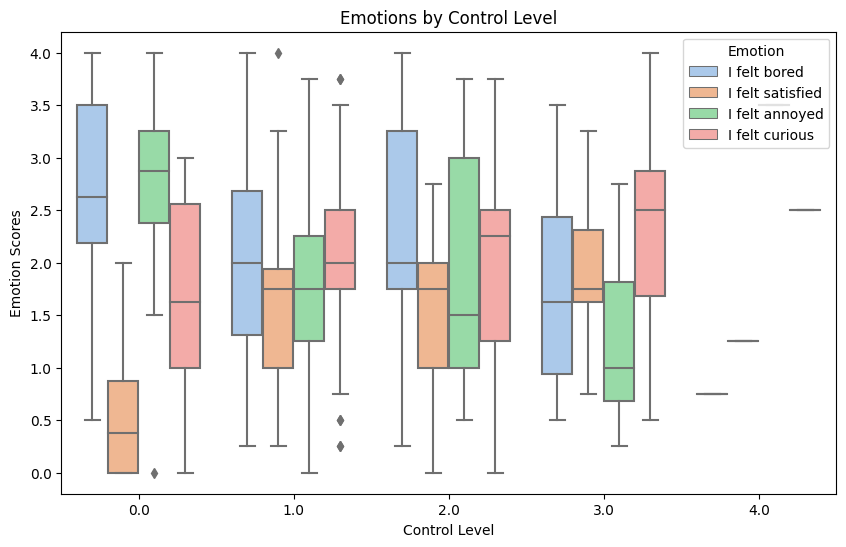

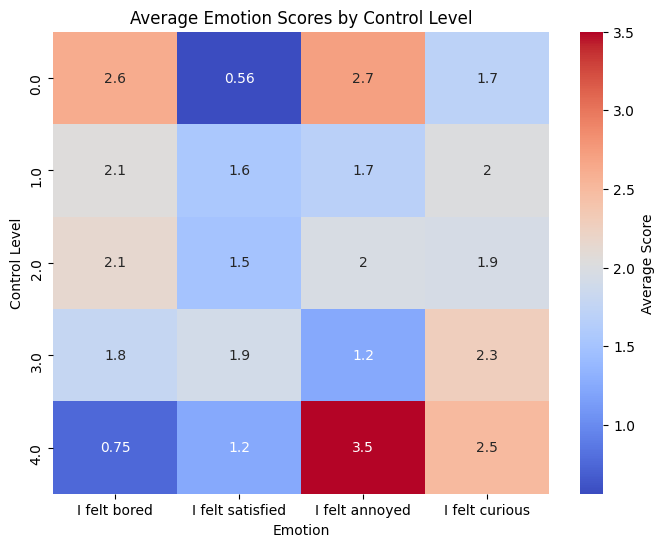

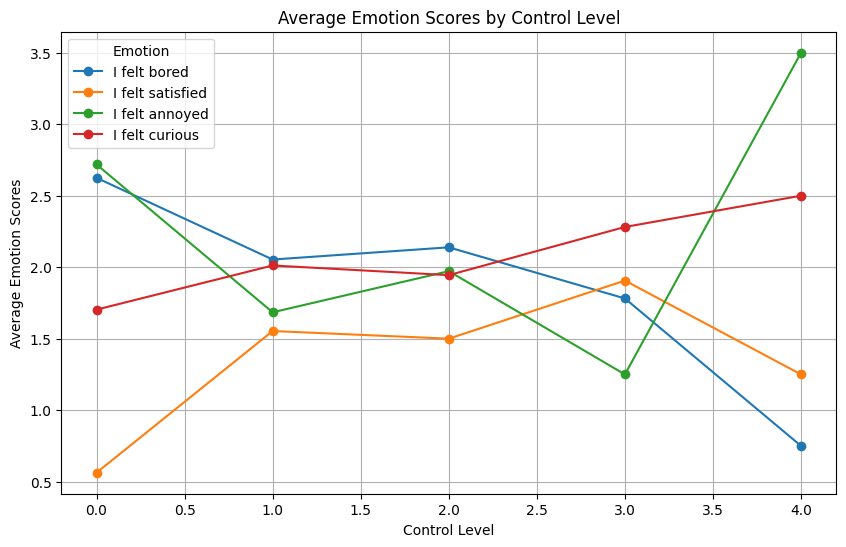

In [160]:
 
# Selecting relevant columns for analysis
emotion_columns = ["I felt bored", "I felt satisfied", "I felt annoyed", "I felt curious"]
control_column = "Who had the overall control of the interaction?"

# Cleaning the data (removing NaN and ensuring numeric types)
filtered_data = data[["Participant ID", control_column] + emotion_columns].dropna()
filtered_data[control_column] = pd.to_numeric(filtered_data[control_column], errors='coerce')
filtered_data[emotion_columns] = filtered_data[emotion_columns].apply(pd.to_numeric, errors='coerce')

# Aggregating by participant for mean emotion scores
aggregated_data = filtered_data.groupby("Participant ID").mean().reset_index()

# Melting the data for visualization
melted_data = aggregated_data.melt(
    id_vars=[control_column], value_vars=emotion_columns, var_name="Emotion", value_name="Score"
)

# Scatter plots with regression lines for each emotion vs. control level
for emotion in emotion_columns:
    sns.lmplot(
        data=aggregated_data,
        x=control_column,
        y=emotion,
        aspect=1.5,
        scatter_kws={'alpha': 0.7},
        line_kws={'color': 'red'}
    )
    plt.title(f"Control vs {emotion}")
    plt.xlabel("Control Level")
    plt.ylabel(emotion)
    plt.show()

# Boxplot of emotions grouped by control level
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=melted_data,
    x=control_column,
    y="Score",
    hue="Emotion",
    palette="pastel"
)
plt.title("Emotions by Control Level")
plt.xlabel("Control Level")
plt.ylabel("Emotion Scores")
plt.legend(title="Emotion", loc="upper right")
plt.show()

# Heatmap of average scores for each control level
heatmap_data = aggregated_data.groupby(control_column)[emotion_columns].mean()
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar_kws={"label": "Average Score"})
plt.title("Average Emotion Scores by Control Level")
plt.xlabel("Emotion")
plt.ylabel("Control Level")
plt.show()

# Line plot of average emotion scores across control levels
plt.figure(figsize=(10, 6))
for emotion in heatmap_data.columns:
    plt.plot(heatmap_data.index, heatmap_data[emotion], marker='o', label=emotion)
plt.title("Average Emotion Scores by Control Level")
plt.xlabel("Control Level")
plt.ylabel("Average Emotion Scores")
plt.legend(title="Emotion")
plt.grid(True)
plt.show()


In [8]:
''' 

import matplotlib.pyplot as plt

# Step 4: Visualize the stacked bar chart for before merging
plt.figure(figsize=(12, 8))
ax = original_breakdown.plot(kind='bar', stacked=True, colormap="viridis", figsize=(10, 6))

# Annotate the bars with the exact participant counts
for bar_container in ax.containers:
    for bar in bar_container:
        height = bar.get_height()
        if height > 0:  # Only annotate non-zero values
            ax.annotate(
                f"{int(height)}",  # Value to annotate
                (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),  # Position
                ha='center', va='center', fontsize=10, color='black'
            )

# Chart details
plt.title("Breakdown of 'I felt bored' Ratings by Original Control Levels", fontsize=16)
plt.xlabel("Control Level", fontsize=12)
plt.ylabel("Number of Participants", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Bored Rating", loc="upper left", bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()
''' 


' \n\nimport matplotlib.pyplot as plt\n\n# Step 4: Visualize the stacked bar chart for before merging\nplt.figure(figsize=(12, 8))\nax = original_breakdown.plot(kind=\'bar\', stacked=True, colormap="viridis", figsize=(10, 6))\n\n# Annotate the bars with the exact participant counts\nfor bar_container in ax.containers:\n    for bar in bar_container:\n        height = bar.get_height()\n        if height > 0:  # Only annotate non-zero values\n            ax.annotate(\n                f"{int(height)}",  # Value to annotate\n                (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),  # Position\n                ha=\'center\', va=\'center\', fontsize=10, color=\'black\'\n            )\n\n# Chart details\nplt.title("Breakdown of \'I felt bored\' Ratings by Original Control Levels", fontsize=16)\nplt.xlabel("Control Level", fontsize=12)\nplt.ylabel("Number of Participants", fontsize=12)\nplt.xticks(rotation=0)\nplt.legend(title="Bored Rating", loc="upper left", bbox_to_anch

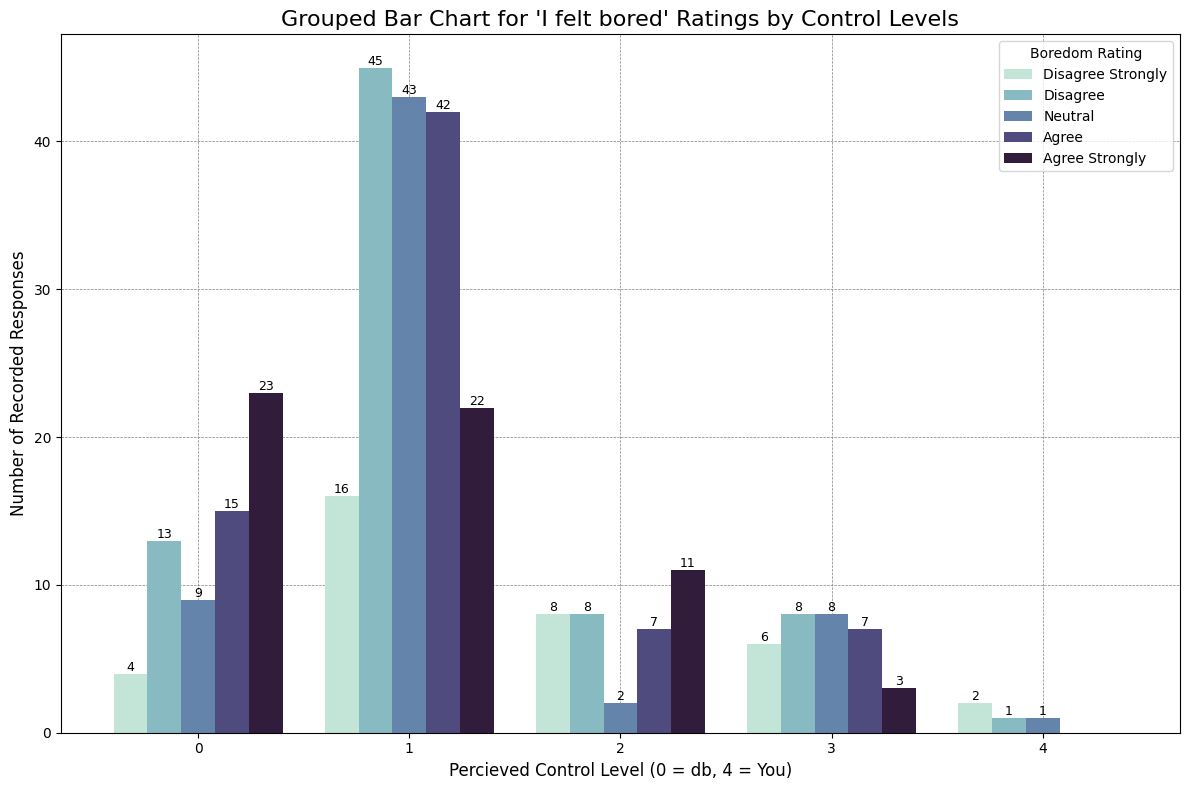

In [13]:
# Define a mapping for the rating labels
rating_labels = {
    0: "Disagree Strongly",
    1: "Disagree",
    2: "Neutral",
    3: "Agree",
    4: "Agree Strongly"
}
# Selecting relevant columns for analysis
emotion_columns = ["I felt bored", "I felt satisfied", "I felt annoyed", "I felt curious"]
control_column = "Who had the overall control of the interaction?"

# Cleaning the data (removing NaN and ensuring numeric types)
filtered_data = data[["Participant ID", control_column] + emotion_columns].dropna()
filtered_data[control_column] = pd.to_numeric(filtered_data[control_column], errors='coerce')
filtered_data[emotion_columns] = filtered_data[emotion_columns].apply(pd.to_numeric, errors='coerce')

# Aggregating by participant for mean emotion scores

# Prepare data for visualization
bored_breakdown_pivot = filtered_data.groupby(control_column)["I felt bored"].value_counts().unstack().fillna(0)

# Rename the columns of the pivot table to the new rating labels
bored_breakdown_pivot_renamed = bored_breakdown_pivot.rename(columns=rating_labels)

# Plot the grouped bar chart with the updated rating labels
fig, ax = plt.subplots(figsize=(12, 8))
bars = bored_breakdown_pivot_renamed.plot(
    kind="bar",
    ax=ax,
    colormap=palette,
    width=0.8
)
ax.set_axisbelow(True)  # Ensure gridlines are behind the bars
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')  # Add gridlines

plt.title("Grouped Bar Chart for 'I felt bored' Ratings by Control Levels", fontsize=16)
plt.xlabel("Percieved Control Level (0 = db, 4 = You)", fontsize=12)
plt.ylabel("Number of Recorded Responses", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Boredom Rating", loc="upper right")

# Add occurrence numbers on top of each bar
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only label bars with non-zero height
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{int(height)}",
                ha="center",
                va="bottom",
                fontsize=9
            )

plt.tight_layout()
#plt.savefig("Figures/Grouped-Bar-Chart-I-felt-bored-vs-Control.png", transparent=True)
plt.show()

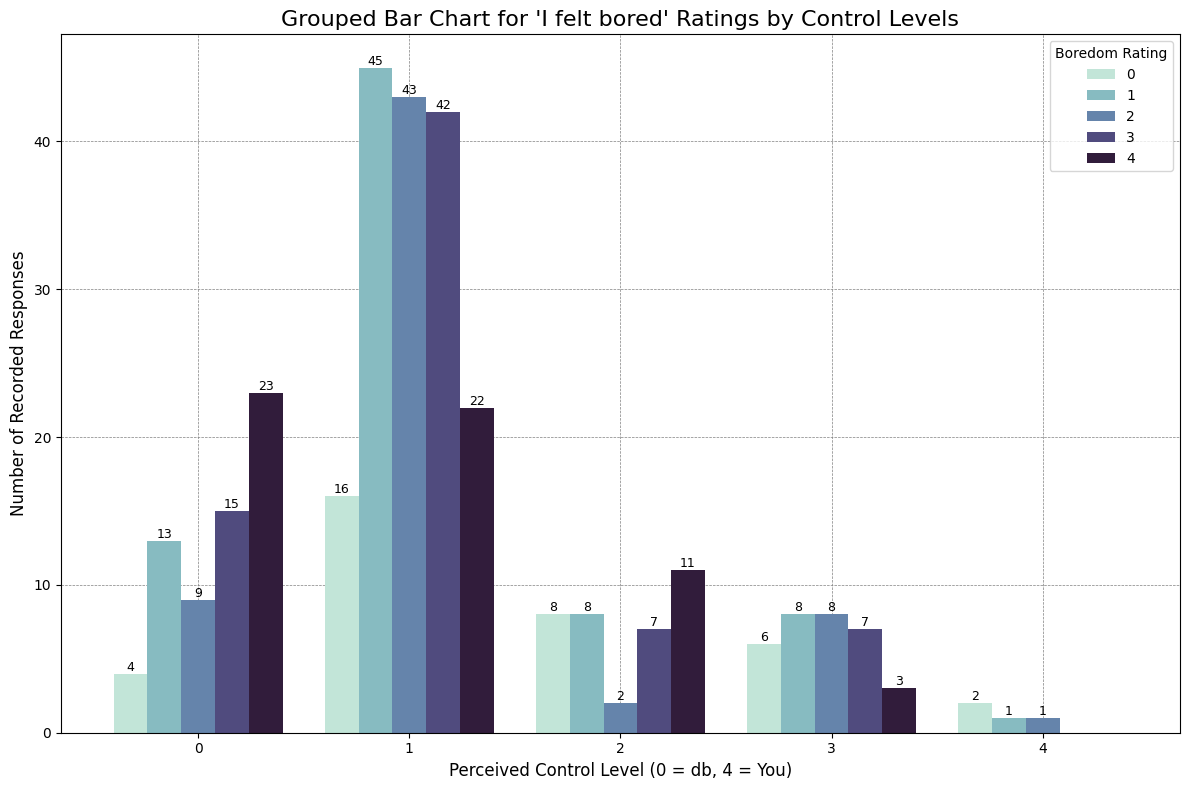

In [368]:
# Selecting relevant columns for analysis
emotion_columns = ["I felt bored", "I felt satisfied", "I felt annoyed", "I felt curious"]
control_column = "Who had the overall control of the interaction?"

# Cleaning the data (removing NaN and ensuring numeric types)
filtered_data = data[["Participant ID", control_column] + emotion_columns].dropna()
filtered_data[control_column] = pd.to_numeric(filtered_data[control_column], errors='coerce')
filtered_data[emotion_columns] = filtered_data[emotion_columns].apply(pd.to_numeric, errors='coerce')

# Aggregating by participant for mean emotion scores

# Prepare data for visualization
bored_breakdown_pivot = filtered_data.groupby(control_column)["I felt bored"].value_counts().unstack().fillna(0)

# Plot the grouped bar chart with the numeric scale in the legend
fig, ax = plt.subplots(figsize=(12, 8))
bars = bored_breakdown_pivot.plot(
    kind="bar",
    ax=ax,
    colormap=palette,
    width=0.8
)
ax.set_axisbelow(True)  # Ensure gridlines are behind the bars
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')  # Add gridlines

plt.title("Grouped Bar Chart for 'I felt bored' Ratings by Control Levels", fontsize=16)
plt.xlabel("Perceived Control Level (0 = db, 4 = You)", fontsize=12)
plt.ylabel("Number of Recorded Responses", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Boredom Rating", loc="upper right")

# Add occurrence numbers on top of each bar
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only label bars with non-zero height
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{int(height)}",
                ha="center",
                va="bottom",
                fontsize=9
            )

plt.tight_layout()
plt.savefig("Figures/NEW-rouped-Bar-Chart-I-felt-bored-vs-Control.png", transparent=True)
plt.show()


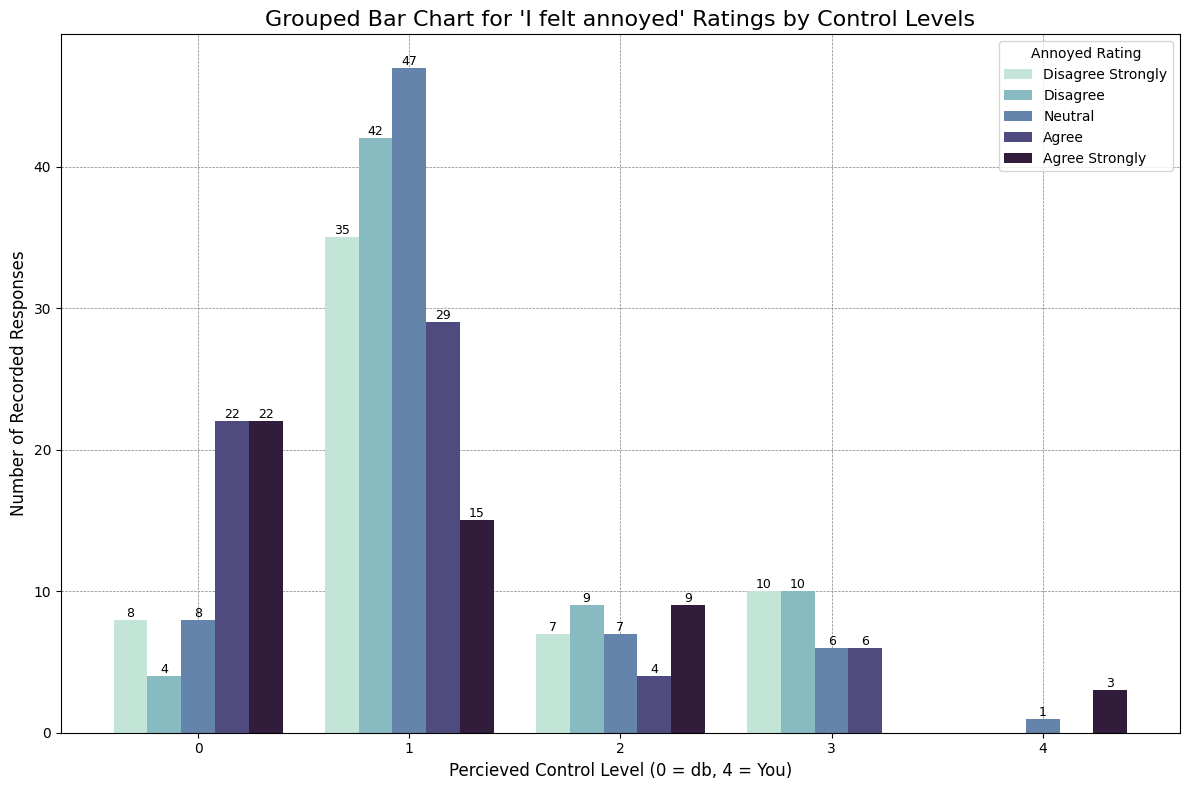

In [14]:
# Prepare data for visualization
annoyed_breakdown_pivot = filtered_data.groupby(control_column)["I felt annoyed"].value_counts().unstack().fillna(0)

# Rename the columns of the pivot table to the new rating labels
annoyed_breakdown_pivot_renamed = annoyed_breakdown_pivot.rename(columns=rating_labels)

# Plot the grouped bar chart with the updated rating labels
fig, ax = plt.subplots(figsize=(12, 8))
bars = annoyed_breakdown_pivot_renamed.plot(
    kind="bar",
    ax=ax,
    colormap=palette,
    width=0.8
)
ax.set_axisbelow(True)  # Ensure gridlines are behind the bars
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')  # Add gridlines

plt.title("Grouped Bar Chart for 'I felt annoyed' Ratings by Control Levels", fontsize=16)
plt.xlabel("Percieved Control Level (0 = db, 4 = You)", fontsize=12)
plt.ylabel("Number of Recorded Responses", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Annoyed Rating", loc="upper right")

# Add occurrence numbers on top of each bar
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only label bars with non-zero height
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{int(height)}",
                ha="center",
                va="bottom",
                fontsize=9
            )

plt.tight_layout()
#plt.savefig("Figures/Grouped-Bar-Chart-I-felt-annoyed-vs-Control.png", transparent=True)
plt.show()

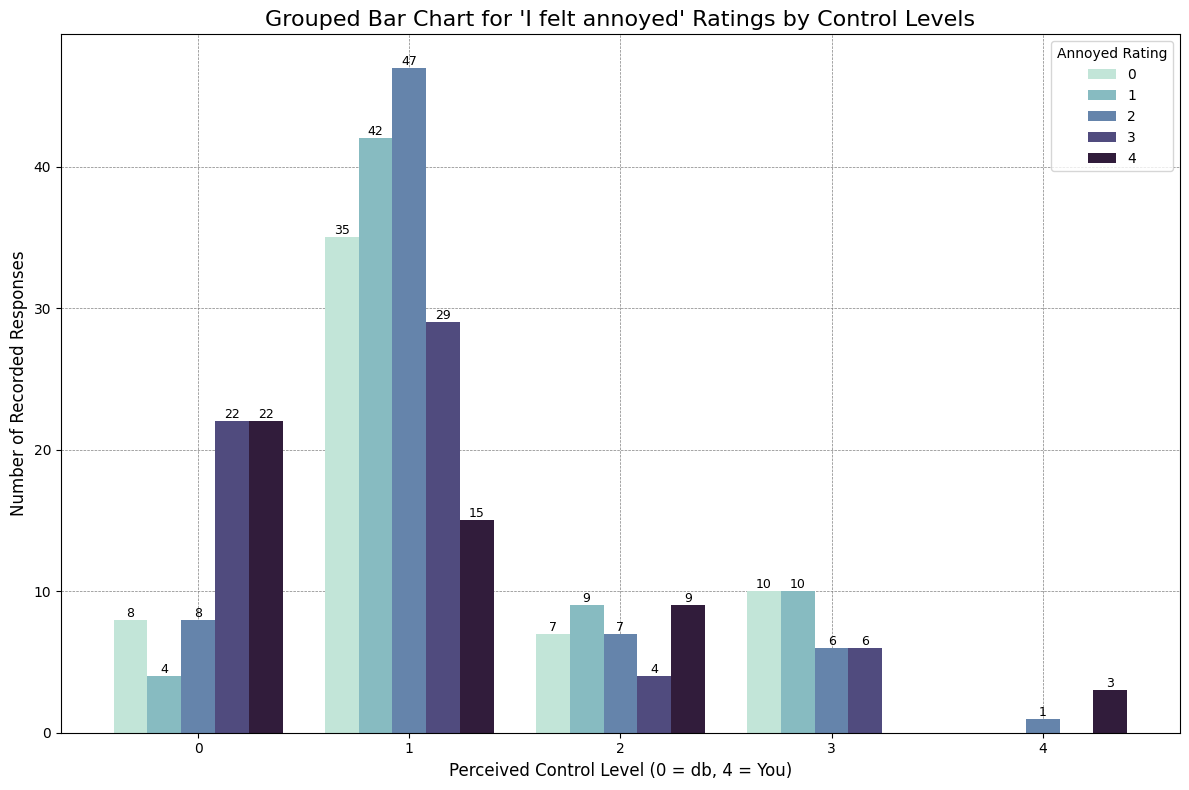

In [369]:
# Prepare data for visualization
annoyed_breakdown_pivot = filtered_data.groupby(control_column)["I felt annoyed"].value_counts().unstack().fillna(0)

# Plot the grouped bar chart with the numeric scale in the legend
fig, ax = plt.subplots(figsize=(12, 8))
bars = annoyed_breakdown_pivot.plot(
    kind="bar",
    ax=ax,
    colormap=palette,
    width=0.8
)
ax.set_axisbelow(True)  # Ensure gridlines are behind the bars
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')  # Add gridlines

plt.title("Grouped Bar Chart for 'I felt annoyed' Ratings by Control Levels", fontsize=16)
plt.xlabel("Perceived Control Level (0 = db, 4 = You)", fontsize=12)
plt.ylabel("Number of Recorded Responses", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Annoyed Rating", loc="upper right")

# Add occurrence numbers on top of each bar
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only label bars with non-zero height
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{int(height)}",
                ha="center",
                va="bottom",
                fontsize=9
            )

plt.tight_layout()
plt.savefig("Figures/NEW-Grouped-Bar-Chart-I-felt-annoyed-vs-Control.png", transparent=True)
plt.show()


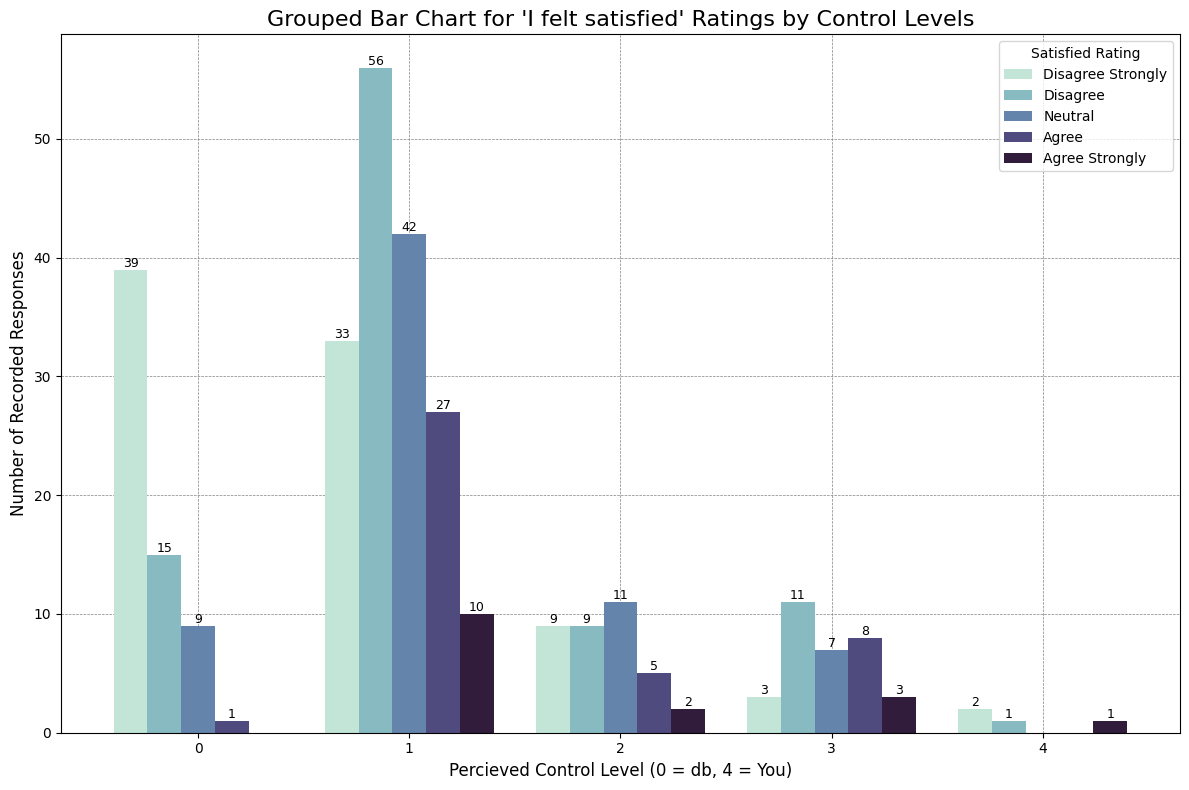

In [ ]:
# Prepare data for visualization
satisfied_breakdown_pivot = filtered_data.groupby(control_column)["I felt satisfied"].value_counts().unstack().fillna(0)

# Rename the columns of the pivot table to the new rating labels
satisfied_breakdown_pivot_renamed = satisfied_breakdown_pivot.rename(columns=rating_labels)

# Plot the grouped bar chart with the updated rating labels
fig, ax = plt.subplots(figsize=(12, 8))
bars = satisfied_breakdown_pivot_renamed.plot(
    kind="bar",
    ax=ax,
    colormap=palette,
    width=0.8
)
ax.set_axisbelow(True)  # Ensure gridlines are behind the bars
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')  # Add gridlines

plt.title("Grouped Bar Chart for 'I felt satisfied' Ratings by Control Levels", fontsize=16)
plt.xlabel("Percieved Control Level (0 = db, 4 = You)", fontsize=12)
plt.ylabel("Number of Recorded Responses", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Satisfied Rating", loc="upper right")

# Add occurrence numbers on top of each bar
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only label bars with non-zero height
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{int(height)}",
                ha="center",
                va="bottom",
                fontsize=9
            )

plt.tight_layout()
#plt.savefig("Figures/Grouped-Bar-Chart-I-felt-satisfied-vs-Control.png", transparent=True)
plt.show()

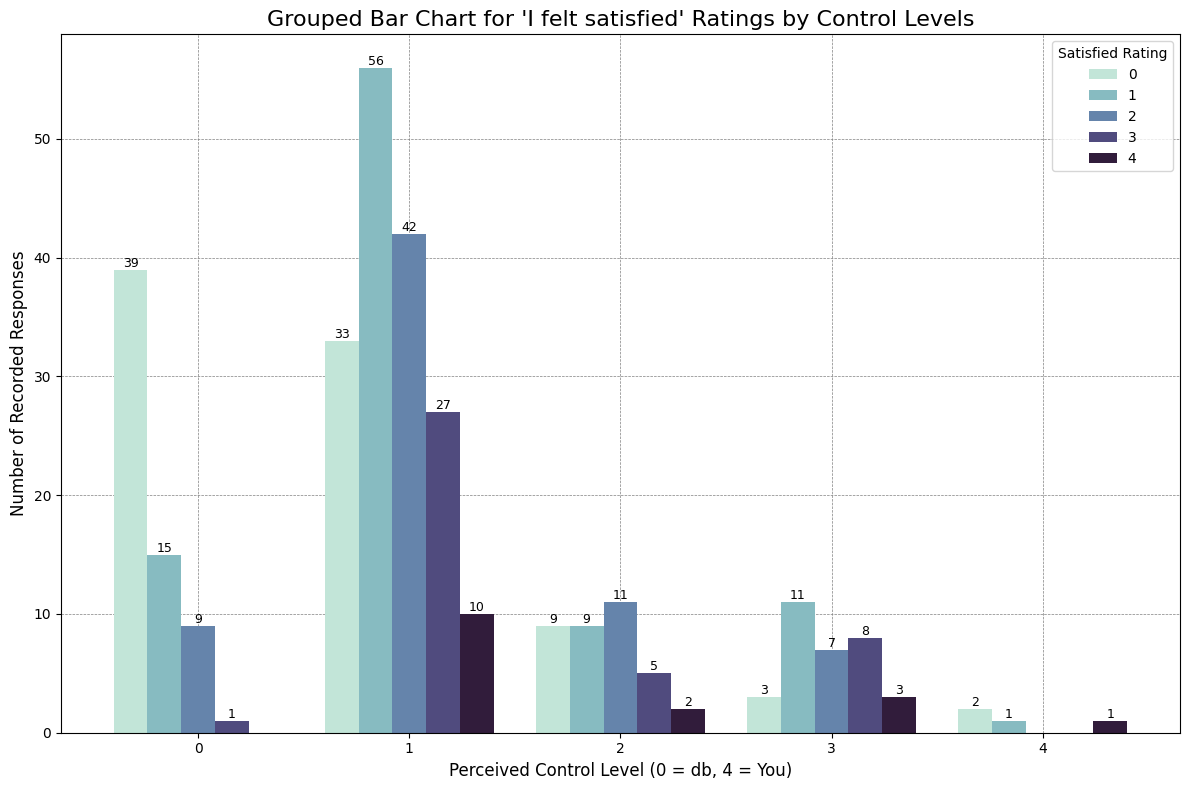

In [370]:
# Prepare data for visualization
satisfied_breakdown_pivot = filtered_data.groupby(control_column)["I felt satisfied"].value_counts().unstack().fillna(0)

# Plot the grouped bar chart with the numeric scale in the legend
fig, ax = plt.subplots(figsize=(12, 8))
bars = satisfied_breakdown_pivot.plot(
    kind="bar",
    ax=ax,
    colormap=palette,
    width=0.8
)
ax.set_axisbelow(True)  # Ensure gridlines are behind the bars
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')  # Add gridlines

plt.title("Grouped Bar Chart for 'I felt satisfied' Ratings by Control Levels", fontsize=16)
plt.xlabel("Perceived Control Level (0 = db, 4 = You)", fontsize=12)
plt.ylabel("Number of Recorded Responses", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Satisfied Rating", loc="upper right")

# Add occurrence numbers on top of each bar
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only label bars with non-zero height
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{int(height)}",
                ha="center",
                va="bottom",
                fontsize=9
            )

plt.tight_layout()
plt.savefig("Figures/NEW-Grouped-Bar-Chart-I-felt-satisfied-vs-Control.png", transparent=True)
plt.show()


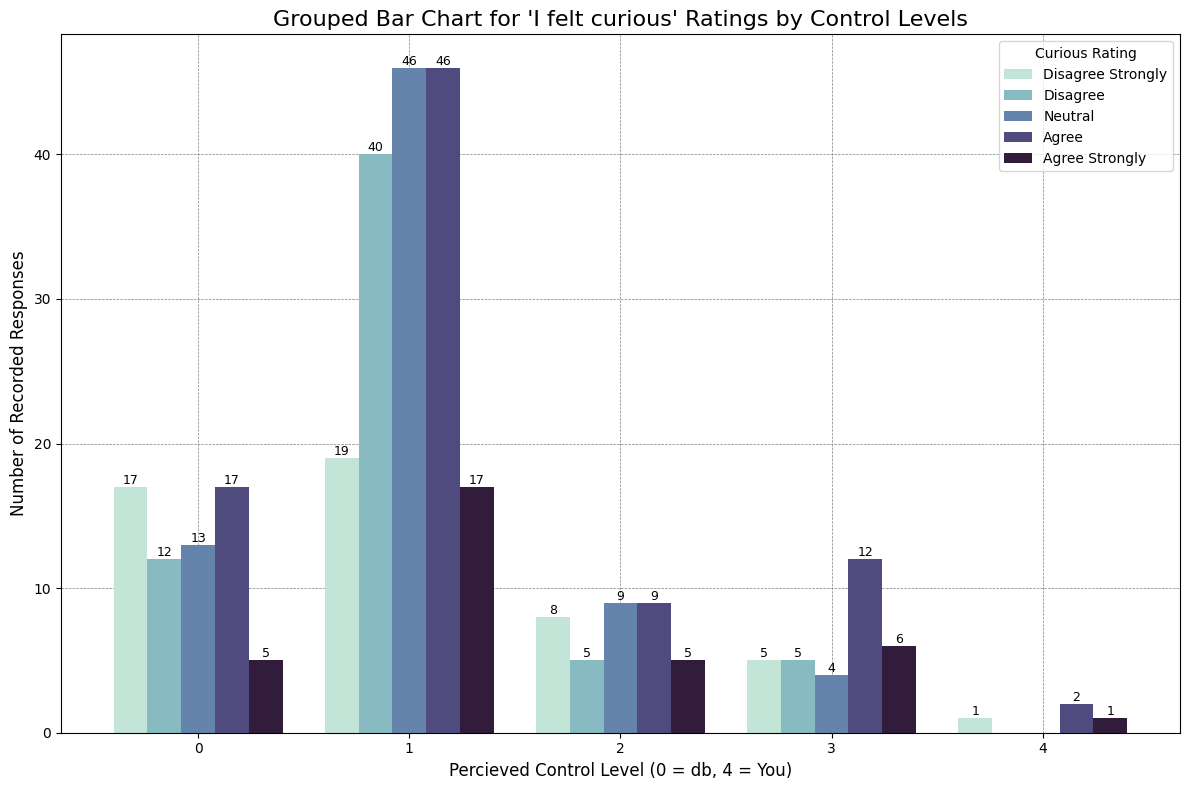

In [ ]:
# Prepare data for visualization
curious_breakdown_pivot = filtered_data.groupby(control_column)["I felt curious"].value_counts().unstack().fillna(0)

# Rename the columns of the pivot table to the new rating labels
curious_breakdown_pivot_renamed = curious_breakdown_pivot.rename(columns=rating_labels)

# Plot the grouped bar chart with the updated rating labels
fig, ax = plt.subplots(figsize=(12, 8))
bars = curious_breakdown_pivot_renamed.plot(
    kind="bar",
    ax=ax,
    colormap=palette,
    width=0.8
)
ax.set_axisbelow(True)  # Ensure gridlines are behind the bars
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')  # Add gridlines

plt.title("Grouped Bar Chart for 'I felt curious' Ratings by Control Levels", fontsize=16)
plt.xlabel("Percieved Control Level (0 = db, 4 = You)", fontsize=12)
plt.ylabel("Number of Recorded Responses", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Curious Rating", loc="upper right")

# Add occurrence numbers on top of each bar
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only label bars with non-zero height
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{int(height)}",
                ha="center",
                va="bottom",
                fontsize=9
            )

plt.tight_layout()
#plt.savefig("Figures/Grouped-Bar-Chart-I-felt-curious-vs-Control.png", transparent=True)
plt.show()

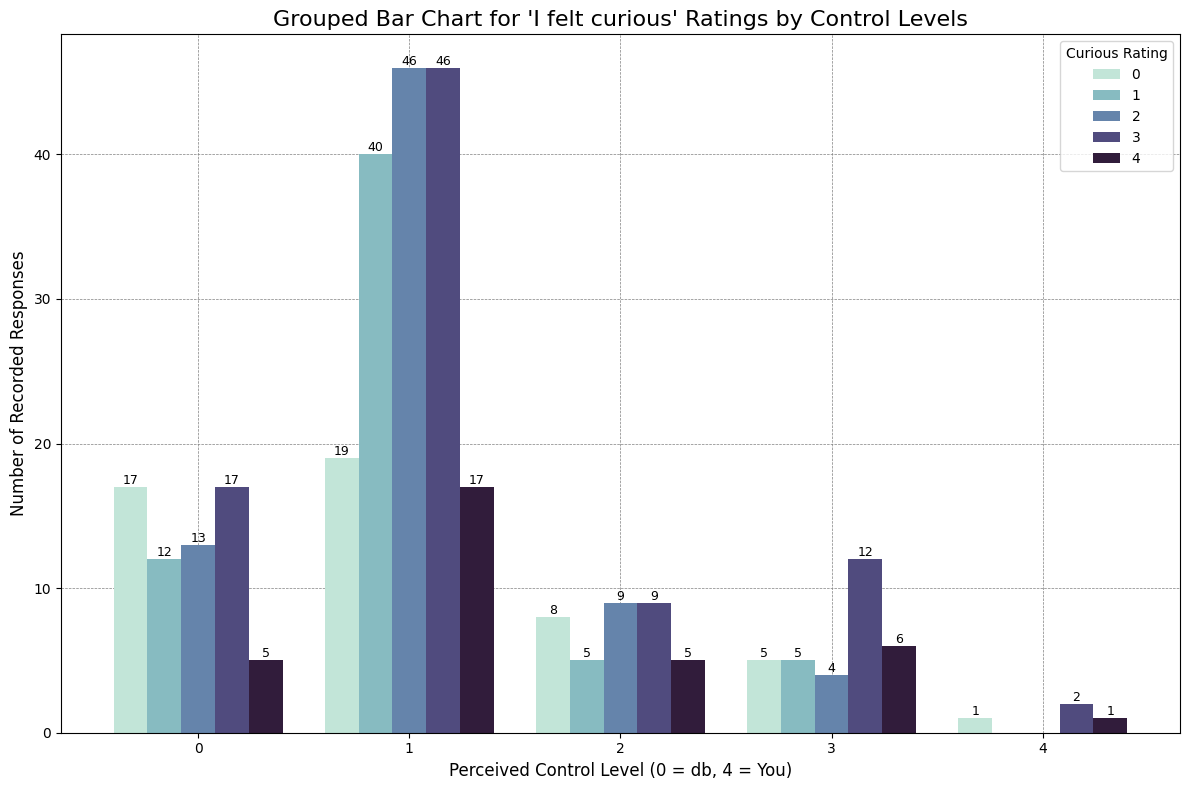

In [371]:
# Prepare data for visualization
curious_breakdown_pivot = filtered_data.groupby(control_column)["I felt curious"].value_counts().unstack().fillna(0)

# Plot the grouped bar chart with the numeric scale in the legend
fig, ax = plt.subplots(figsize=(12, 8))
bars = curious_breakdown_pivot.plot(
    kind="bar",
    ax=ax,
    colormap=palette,
    width=0.8
)
ax.set_axisbelow(True)  # Ensure gridlines are behind the bars
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')  # Add gridlines

plt.title("Grouped Bar Chart for 'I felt curious' Ratings by Control Levels", fontsize=16)
plt.xlabel("Perceived Control Level (0 = db, 4 = You)", fontsize=12)
plt.ylabel("Number of Recorded Responses", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Curious Rating", loc="upper right")

# Add occurrence numbers on top of each bar
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only label bars with non-zero height
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{int(height)}",
                ha="center",
                va="bottom",
                fontsize=9
            )

plt.tight_layout()
plt.savefig("Figures/NEW-Grouped-Bar-Chart-I-felt-curious-vs-Control.png", transparent=True)
plt.show()


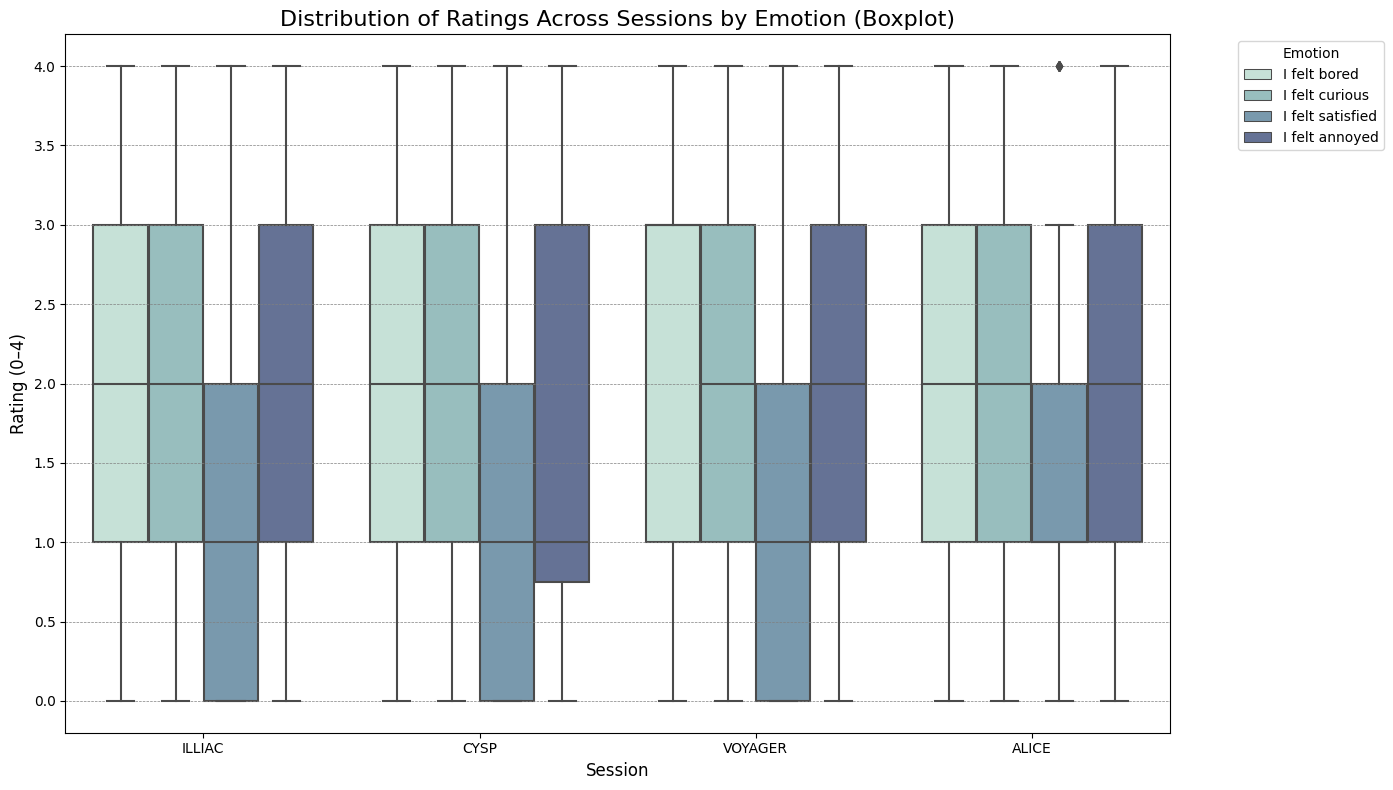

In [25]:
# Columns to include in the melted data
emotions = ['I felt bored', 'I felt curious', 'I felt satisfied', 'I felt annoyed']
# Preprocess the Session ID column
data['Session ID (the last session that the participant has completed)'] = data[
    'Session ID (the last session that the participant has completed)'
].str.upper().str.replace(" ", "")

# Melt the data for visualization
melted_data = data.melt(
    id_vars='Session ID (the last session that the participant has completed)',  # Columns to keep
    value_vars=emotions,  # Columns to melt
    var_name='Emotion',  # New column name for the emotions
    value_name='Rating'  # New column name for the ratings
)
# Generate a list of colors from the colormap
palette = sns.color_palette(sns.cubehelix_palette(start=0.5, rot=-0.5, as_cmap=False), n_colors=len(melted_data['Emotion'].unique()))

# Create a boxplot with sessions on the x-axis and emotions as the hue
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Session ID (the last session that the participant has completed)',
    y='Rating',
    hue='Emotion',
    data=melted_data,
    palette=palette,
    dodge=True  # Separate boxes by emotion
)
plt.title("Distribution of Ratings Across Sessions by Emotion (Boxplot)", fontsize=16)
plt.xlabel("Session", fontsize=12)
plt.ylabel("Rating (0–4)", fontsize=12)
plt.legend(title="Emotion", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()


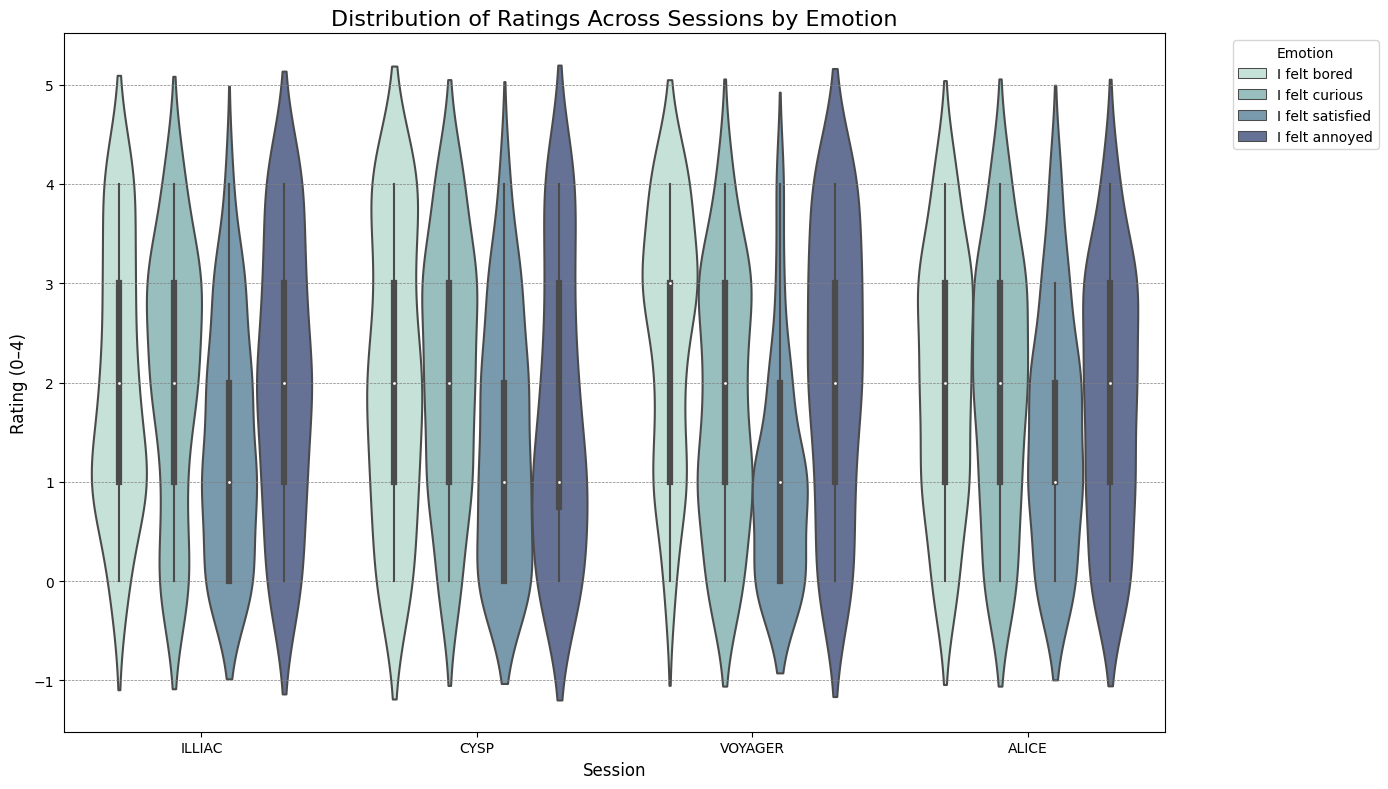

In [39]:
# Create a violin plot with sessions on the x-axis and emotions as the hue
plt.figure(figsize=(14, 8))
sns.violinplot(
    x='Session ID (the last session that the participant has completed)',
    y='Rating',
    hue='Emotion',
    data=melted_data,
    palette=palette,
    dodge=True,  # Separate violins by emotion
    scale="width"
)
plt.title("Distribution of Ratings Across Sessions by Emotion", fontsize=16)
plt.xlabel("Session", fontsize=12)
plt.ylabel("Rating (0–4)", fontsize=12)
plt.legend(title="Emotion", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout(pad=1)  # Reduce padding around the plot
plt.tight_layout()
plt.show()

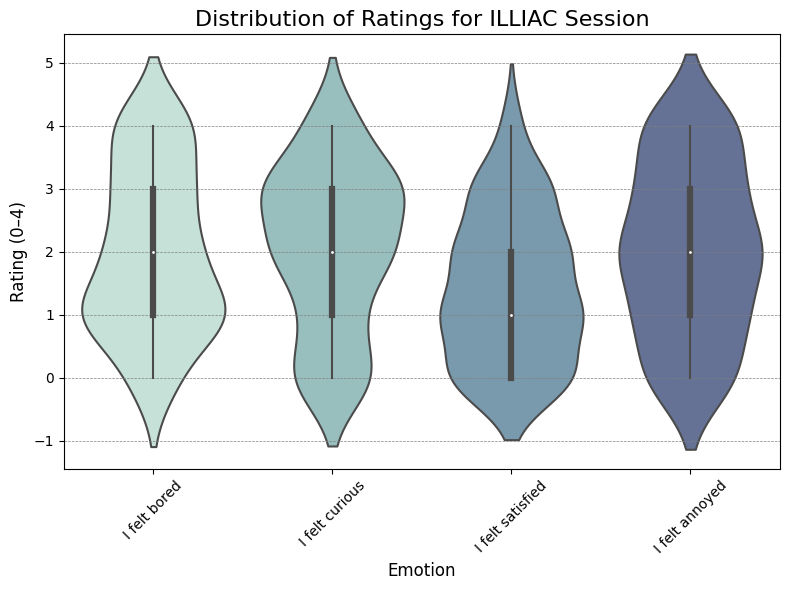

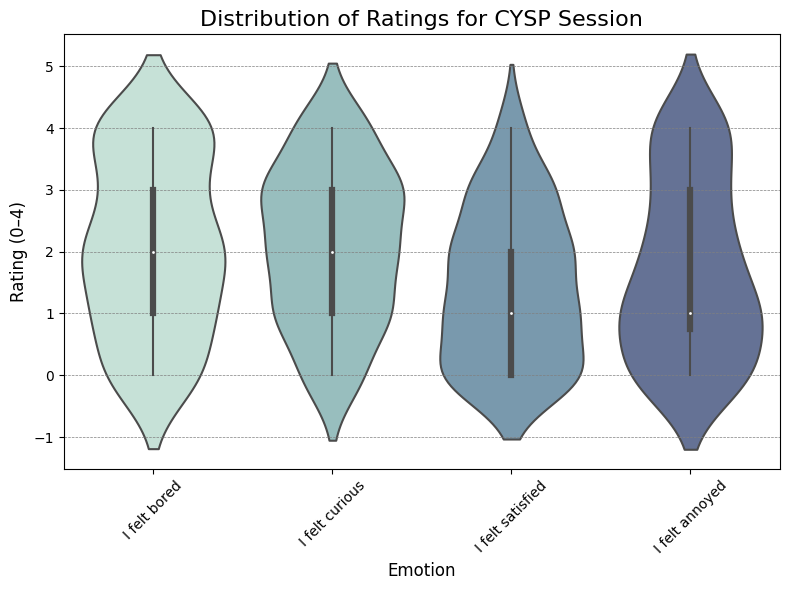

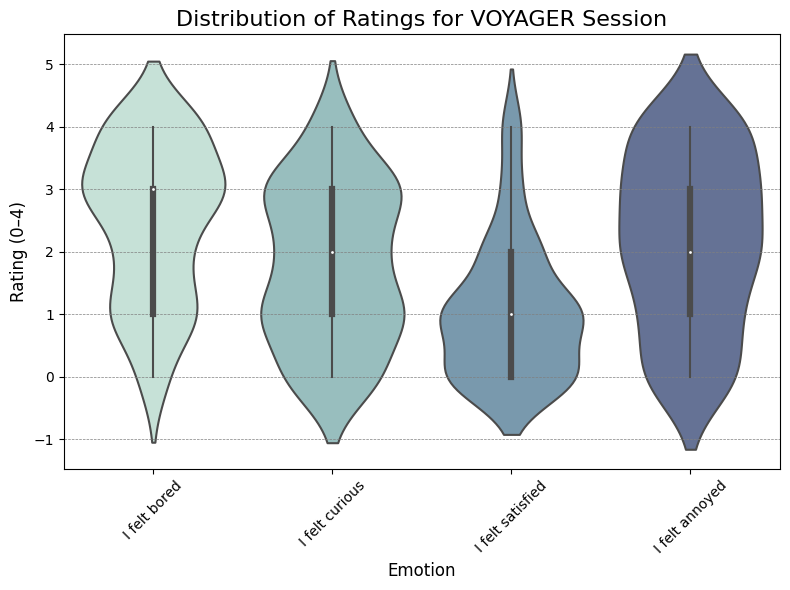

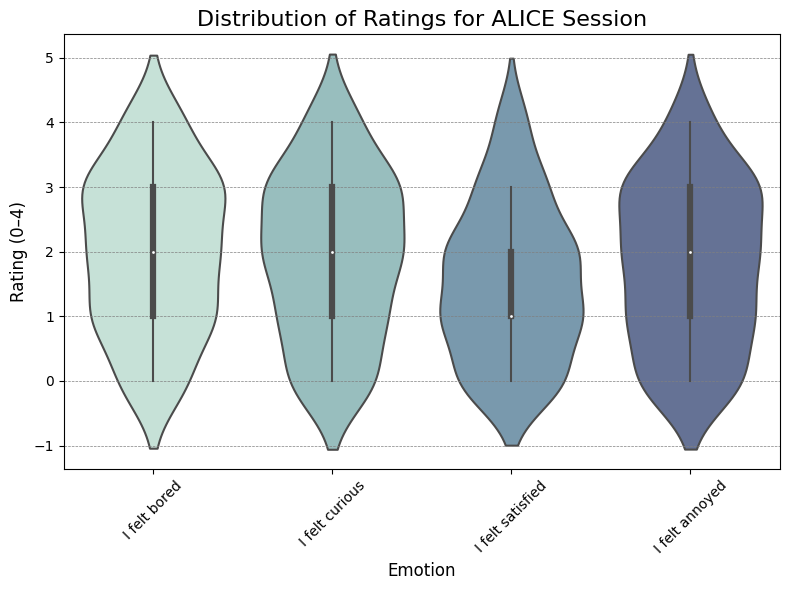

In [42]:
unique_sessions = melted_data['Session ID (the last session that the participant has completed)'].unique()
# Loop through each session and create individual violin plots
for session in unique_sessions:
    subset = melted_data[melted_data['Session ID (the last session that the participant has completed)'] == session]
    plt.figure(figsize=(8, 6))
    sns.violinplot(
        x='Emotion',
        y='Rating',
        data=subset,
        palette=palette,
        scale="width"
    )
    plt.title(f"Distribution of Ratings for {session} Session", fontsize=16)
    plt.xlabel("Emotion", fontsize=12)
    plt.ylabel("Rating (0–4)", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
    plt.tight_layout()
    plt.savefig(f'Figures/Violin-{session}.png', transparent=True)
    plt.show()


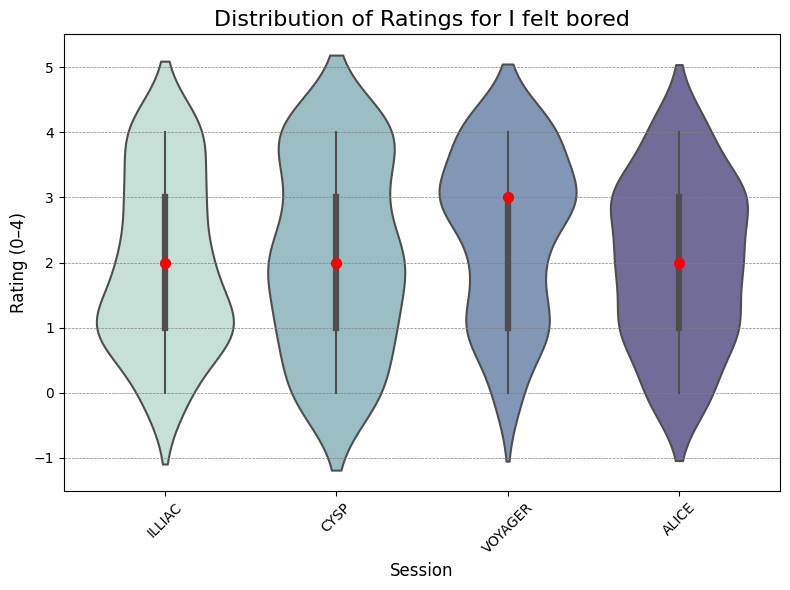

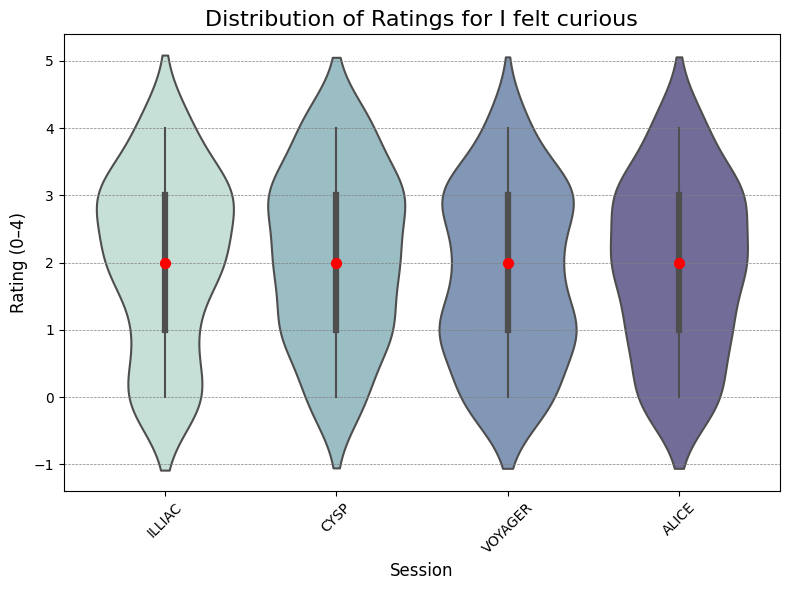

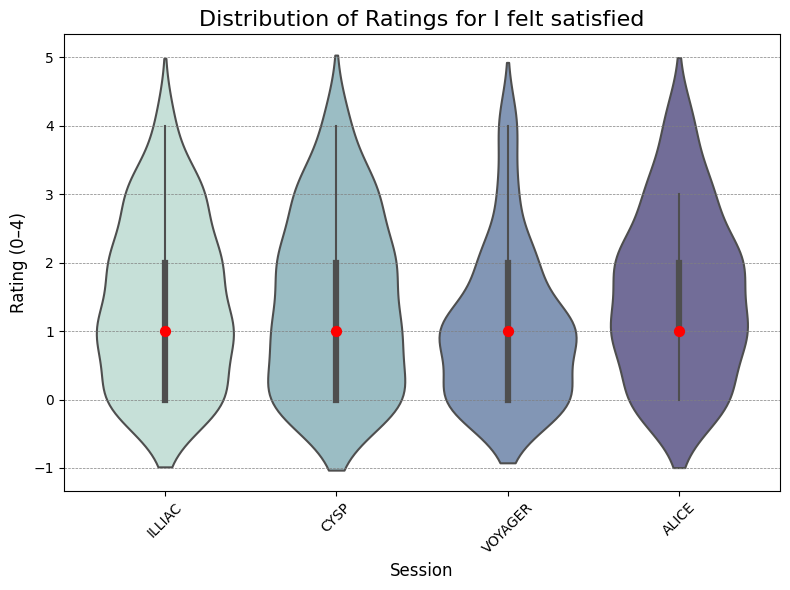

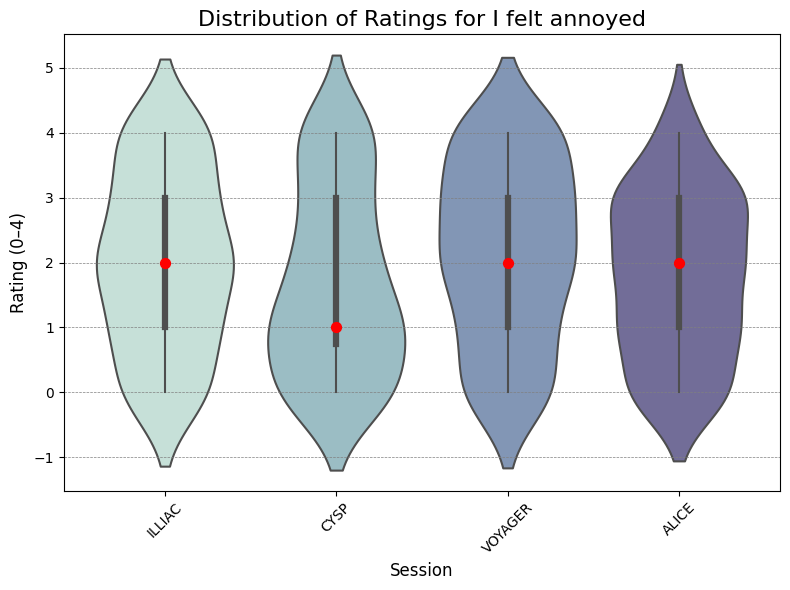

In [95]:
# Define unique emotions in the dataset
unique_emotions = melted_data['Emotion'].unique()

# Loop through each emotion and create a violin plot with sessions on the x-axis
for emotion in unique_emotions:
    subset = melted_data[melted_data['Emotion'] == emotion]
    plt.figure(figsize=(8, 6))
    sns.violinplot(
        x='Session ID (the last session that the participant has completed)',
        y='Rating',
        data=subset,
        palette=palette,
        scale="width"
    )
    
    # Add red median dots for each session
    for session in subset['Session ID (the last session that the participant has completed)'].unique():
        session_subset = subset[subset['Session ID (the last session that the participant has completed)'] == session]
        median = session_subset['Rating'].median()
        x_pos = list(subset['Session ID (the last session that the participant has completed)'].unique()).index(session)
        plt.scatter(x=x_pos, y=median, color='red', s=50, zorder=10, label='_nolegend_')
    
    plt.title(f"Distribution of Ratings for {emotion}", fontsize=16)
    plt.xlabel("Session", fontsize=12)
    plt.ylabel("Rating (0–4)", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
    plt.tight_layout()
    plt.savefig(f'Figures/Emotion-{emotion.replace(" ", "_")}.png', transparent=True)
    plt.show()


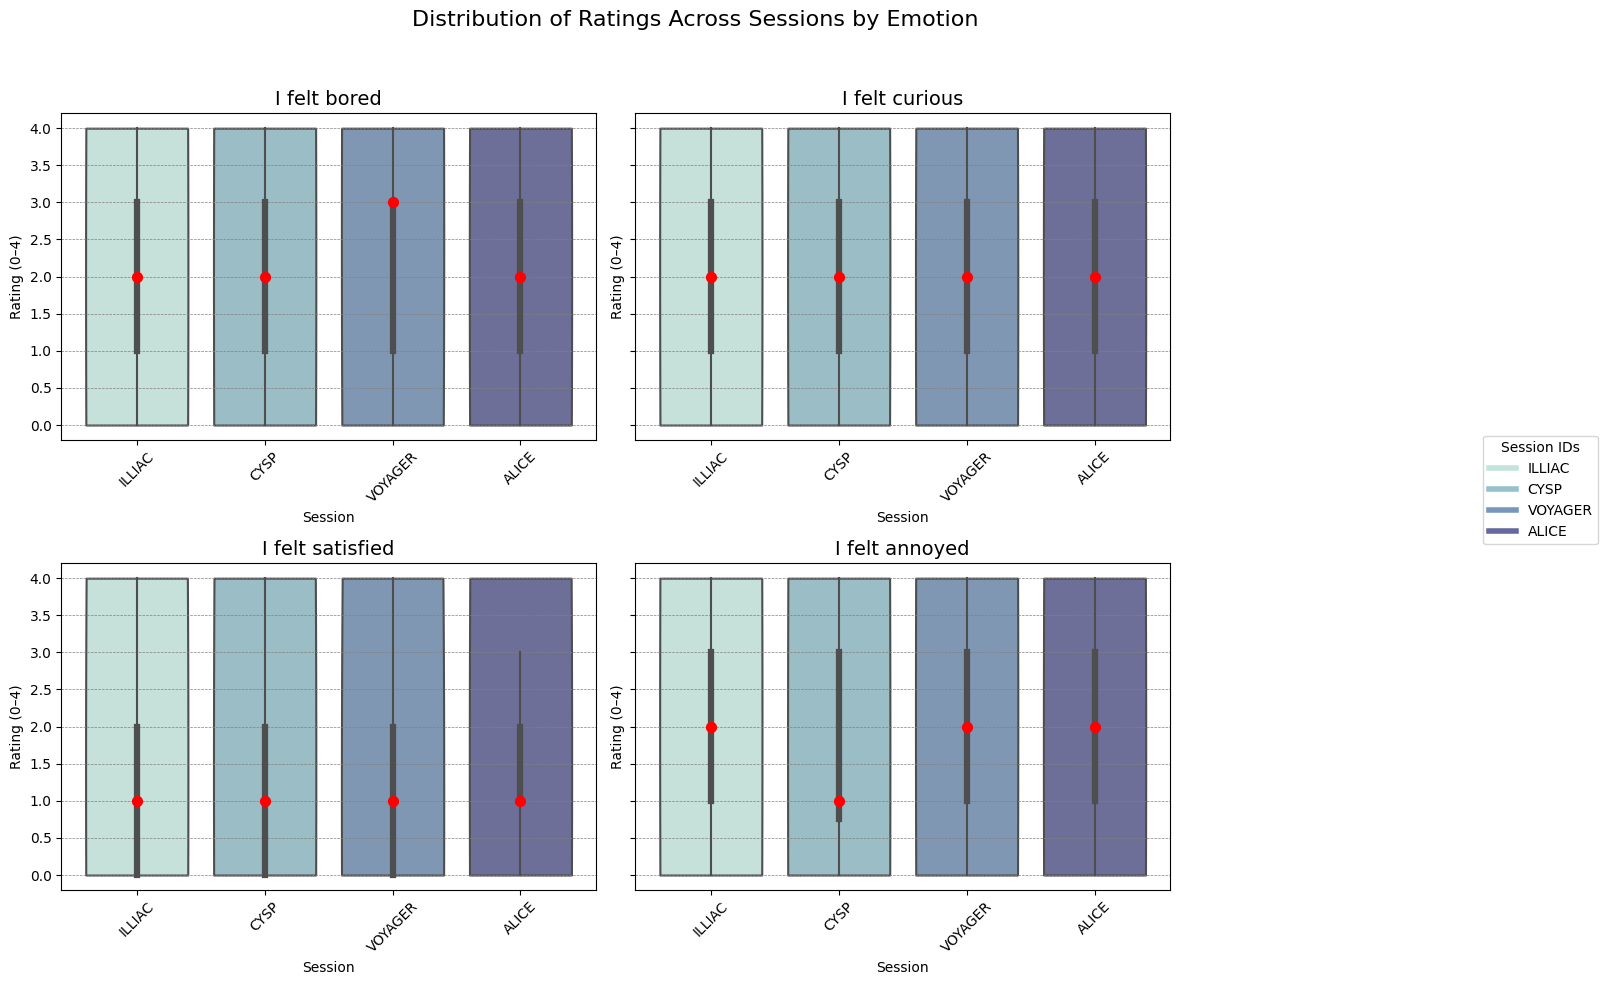

In [125]:
# Use the original palette for sessions
palette = sns.cubehelix_palette(start=0.8, rot=-0.6, n_colors=len(unique_sessions))
palette = sns.cubehelix_palette(start=0.6, rot=-0.5, as_cmap=False)
# Map the sessions to the colors in the original palette
session_color_map = dict(zip(unique_sessions, palette))

# Create a 2x2 subplot grid for the emotions
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()  # Flatten the grid for easy indexing

# Loop through each emotion and create a violin plot in a subplot
for ax, emotion in zip(axes, unique_emotions):
    subset = melted_data[melted_data['Emotion'] == emotion]
    sns.violinplot(
        x='Session ID (the last session that the participant has completed)',
        y='Rating',
        data=subset,
        palette=session_color_map,  # Use the original mapped colors for sessions
        scale="width",
        ax=ax,
        cut=0,
        bw=15
    )
    
    # Add red median dots for each session
    for session in subset['Session ID (the last session that the participant has completed)'].unique():
        session_subset = subset[subset['Session ID (the last session that the participant has completed)'] == session]
        median = session_subset['Rating'].median()
        x_pos = list(subset['Session ID (the last session that the participant has completed)'].unique()).index(session)
        ax.scatter(x=x_pos, y=median, color='red', s=50, zorder=10, label='_nolegend_')
    
    ax.set_title(emotion, fontsize=14)
    ax.set_xlabel("Session", fontsize=10)
    ax.set_ylabel("Rating (0–4)", fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Add a legend for the session colors
legend_patches = [plt.Line2D([0], [0], color=color, lw=4, label=session) for session, color in session_color_map.items()]
fig.legend(handles=legend_patches, title="Session IDs", loc="center right", bbox_to_anchor=(1.15, 0.5))

# Adjust layout and add a super title
fig.suptitle("Distribution of Ratings Across Sessions by Emotion", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.85, 0.95])  # Adjust layout to make room for the legend
plt.show()


In [ ]:
# Create a dummy figure for the legend
fig_legend = plt.figure(figsize=(4, 2))

# Define legend patches for the session colors
legend_patches = [plt.Line2D([0], [0], color=color, lw=4, label=session) for session, color in session_color_map.items()]

# Add the legend to the figure
fig_legend.legend(
    handles=legend_patches,
    title="Session IDs",
    loc="center",
    frameon=False
)

# Save the legend as a separate PNG file
#fig_legend.savefig("Session_Legend.png", bbox_inches='tight', transparent=True)
plt.close(fig_legend)  # Close the dummy figure after saving

ANOVA

In [116]:
# Reshape the data for one-way repeated measures ANOVA
# Focus on the emotions and session IDs

emotion_columns = [
    'I felt bored', 'I felt annoyed', 'I felt excited',
    'I felt at ease', 'I felt satisfied', 'I felt curious',
    'I felt stressed', 'I felt tired'
]

# Melt the dataset to have 'Emotion', 'Session ID', and 'Rating'
melted_anova_data = data.melt(
    id_vars=['Participant ID', 'Session ID (the last session that the participant has completed)'],
    value_vars=emotion_columns,
    var_name='Emotion',
    value_name='Rating'
)

# Ensure the column names are consistent for analysis
melted_anova_data = melted_anova_data.rename(columns={
    'Session ID (the last session that the participant has completed)': 'Session_ID'
})

# Display the first few rows of the melted data
melted_anova_data.head()
# Preprocess the Session_ID column (uppercase and remove whitespaces)
melted_anova_data['Session_ID'] = melted_anova_data['Session_ID'].str.upper().str.replace(" ", "")
# Clean up column names to avoid issues
melted_anova_data = melted_anova_data.rename(columns={
    'Participant ID': 'Participant_ID',
    'Session_ID': 'Session_ID',  # Ensuring it's consistent
    'Emotion': 'Emotion',
    'Rating': 'Rating'
})

# Update the function to reference the renamed column
def perform_anova_fixed(emotion):
    """
    Perform a one-way repeated measures ANOVA for a specific emotion.
    
    Parameters:
        emotion (str): The emotion to analyze (e.g., "I felt curious").
    
    Returns:
        None. Prints the ANOVA summary.
    """
    # Filter data for the selected emotion
    emotion_data = melted_anova_data[melted_anova_data['Emotion'] == emotion]
    
    # Run repeated measures ANOVA
    anova = AnovaRM(data=emotion_data, depvar='Rating', subject='Participant_ID', within=['Session_ID'])
    anova_results = anova.fit()
    
    # Print the results
    print(f"ANOVA Results for Emotion: {emotion}")
    print(anova_results.summary())


In [118]:
perform_anova_fixed("I felt bored")
perform_anova_fixed("I felt curious")
perform_anova_fixed("I felt satisfied")
perform_anova_fixed("I felt annoyed")

ANOVA Results for Emotion: I felt bored
                  Anova
           F Value Num DF  Den DF  Pr > F
-----------------------------------------
Session_ID  4.7959 3.0000 225.0000 0.0029

ANOVA Results for Emotion: I felt curious
                  Anova
           F Value Num DF  Den DF  Pr > F
-----------------------------------------
Session_ID  1.8798 3.0000 225.0000 0.1338

ANOVA Results for Emotion: I felt satisfied
                  Anova
           F Value Num DF  Den DF  Pr > F
-----------------------------------------
Session_ID  4.7310 3.0000 225.0000 0.0032

ANOVA Results for Emotion: I felt annoyed
                  Anova
           F Value Num DF  Den DF  Pr > F
-----------------------------------------
Session_ID  3.6683 3.0000 225.0000 0.0130



In [377]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define a function to perform Tukey's HSD post-hoc test for a specific emotion
def perform_tukey(emotion):
    """
    Perform Tukey's HSD post-hoc test for a specific emotion.

    Parameters:
        emotion (str): The emotion to analyze (e.g., "I felt curious").

    Returns:
        None. Prints the Tukey's HSD results.
    """
    # Filter data for the selected emotion
    emotion_data = melted_anova_data[melted_anova_data['Emotion'] == emotion]
    
    # Ensure we have sufficient data points and multiple groups
    if len(emotion_data['Session_ID'].unique()) < 2:
        print(f"Not enough groups to perform Tukey's HSD for {emotion}.")
        return
    
    # Perform Tukey's HSD
    tukey_results = pairwise_tukeyhsd(
        endog=emotion_data['Rating'],        # Dependent variable
        groups=emotion_data['Session_ID'],  # Independent variable
        alpha=0.05                          # Significance level
    )
    
    # Print the results
    print(f"Tukey's HSD Results for Emotion: {emotion}")
    print(tukey_results.summary())
    return tukey_results

# Test the function with an example emotion
#perform_tukey("I felt bored")
#perform_tukey("I felt satisfied")
perform_tukey("I felt annoyed")


Tukey's HSD Results for Emotion: I felt annoyed
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
 ALICE    CYSP  -0.1053 0.9637  -0.673 0.4624  False
 ALICE  ILLIAC   0.2105 0.7733 -0.3572 0.7782  False
 ALICE VOYAGER   0.3421  0.405 -0.2256 0.9098  False
  CYSP  ILLIAC   0.3158 0.4772 -0.2519 0.8835  False
  CYSP VOYAGER   0.4474 0.1772 -0.1203 1.0151  False
ILLIAC VOYAGER   0.1316 0.9324 -0.4361 0.6993  False
----------------------------------------------------


In [378]:

# Generate the Tukey test results
tukey_result = perform_tukey("I felt annoyed")

# Extract results from Tukey test
comparison_labels = [f"{a} - {b}" for a, b in tukey_result._pairs]
mean_differences = tukey_result.meandiffs
p_values = tukey_result.pvalues
conf_intervals = tukey_result.confint  # Confidence intervals (lower, upper)

# Create forest plot
plt.figure(figsize=(10, 6))
for i, (label, mean_diff, ci, p_val) in enumerate(zip(comparison_labels, mean_differences, conf_intervals, p_values)):
    # Extract lower and upper bounds for the confidence interval
    lower_ci, upper_ci = ci
    error = [[mean_diff - lower_ci], [upper_ci - mean_diff]]
    
    # Plot the mean difference and confidence intervals
    plt.errorbar(
        mean_diff, i, 
        xerr=error, 
        fmt='o', color='blue', ecolor='black'
    )

# Add labels, formatting, and styling
plt.yticks(range(len(comparison_labels)), comparison_labels)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # Zero line
plt.xlabel('Mean Difference')
plt.ylabel('Comparison')
plt.title("Tukey HSD Post-Hoc Test - Multiple Comparisons")
plt.tight_layout()

# Show plot
plt.show()

Tukey's HSD Results for Emotion: I felt annoyed
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
 ALICE    CYSP  -0.1053 0.9637  -0.673 0.4624  False
 ALICE  ILLIAC   0.2105 0.7733 -0.3572 0.7782  False
 ALICE VOYAGER   0.3421  0.405 -0.2256 0.9098  False
  CYSP  ILLIAC   0.3158 0.4772 -0.2519 0.8835  False
  CYSP VOYAGER   0.4474 0.1772 -0.1203 1.0151  False
ILLIAC VOYAGER   0.1316 0.9324 -0.4361 0.6993  False
----------------------------------------------------


AttributeError: 'TukeyHSDResults' object has no attribute '_pairs'

In [373]:
# Generate the Tukey test results
tukey_result = perform_tukey("I felt annoyed")
# Extract results from Tukey test
comparison_labels = [f"{a} - {b}" for a, b in tukey_result._pairs]
mean_differences = tukey_result.meandiffs
p_values = tukey_result.pvalues
conf_intervals = tukey_result.confint

# Create forest plot
plt.figure(figsize=(10, 6))
for i, (label, mean_diff, ci, p_val) in enumerate(zip(comparison_labels, mean_differences, conf_intervals, p_values)):
    # Plot the mean difference and confidence intervals
    plt.errorbar(
        mean_diff, i, 
        xerr=[[mean_diff - ci[0]], [ci[1] - mean_diff]], 
        fmt='o', color='blue', ecolor='black'
    )

# Add labels, formatting, and styling
plt.yticks(range(len(comparison_labels)), comparison_labels)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Mean Difference')
plt.ylabel('Comparison')
plt.title("Tukey HSD Post-Hoc Test - Multiple Comparisons")
plt.tight_layout()

# Show plot
plt.show()

Tukey's HSD Results for Emotion: I felt annoyed
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
 ALICE    CYSP  -0.1053 0.9637  -0.673 0.4624  False
 ALICE  ILLIAC   0.2105 0.7733 -0.3572 0.7782  False
 ALICE VOYAGER   0.3421  0.405 -0.2256 0.9098  False
  CYSP  ILLIAC   0.3158 0.4772 -0.2519 0.8835  False
  CYSP VOYAGER   0.4474 0.1772 -0.1203 1.0151  False
ILLIAC VOYAGER   0.1316 0.9324 -0.4361 0.6993  False
----------------------------------------------------


AttributeError: 'SimpleTable' object has no attribute '_pairs'

In [144]:
# Define a function to perform Games-Howell test for a specific emotion
import pingouin as pg

def perform_games_howell(emotion):
    """
    Perform the Games-Howell test for a specific emotion.

    Parameters:
        emotion (str): The emotion to analyze (e.g., "I felt curious").

    Returns:
        None. Prints the Games-Howell test results.
    """
    # Filter data for the selected emotion
    emotion_data = melted_anova_data[melted_anova_data['Emotion'] == emotion]
    
    # Perform Games-Howell test using Pingouin
    games_howell_results = pg.pairwise_gameshowell(
        data=emotion_data,
        dv='Rating',  # Dependent variable
        between='Session_ID'  # Independent variable
    )
    
    # Print the results
    print(f"Games-Howell Test Results for Emotion: {emotion}")
    print(games_howell_results)

# Test the function with an example emotion
perform_games_howell("I felt satisfied")


Games-Howell Test Results for Emotion: I felt satisfied
        A        B   mean(A)   mean(B)      diff        se         T  \
0   ALICE     CYSP  1.539474  1.447368  0.092105  0.195417  0.471326   
1   ALICE   ILLIAC  1.539474  1.434211  0.105263  0.190821  0.551632   
2   ALICE  VOYAGER  1.539474  1.065789  0.473684  0.185223  2.557376   
3    CYSP   ILLIAC  1.447368  1.434211  0.013158  0.194422  0.067677   
4    CYSP  VOYAGER  1.447368  1.065789  0.381579  0.188931  2.019676   
5  ILLIAC  VOYAGER  1.434211  1.065789  0.368421  0.184173  2.000408   

           df      pval    hedges  
0  149.802285  0.965255  0.076076  
1  149.982987  0.945981  0.089038  
2  149.212053  0.055469  0.412783  
3  149.669916  0.999888  0.010924  
4  148.247989  0.185413  0.325994  
5  149.424386  0.192462  0.322884  


In [146]:
# Function to create a heatmap of p-values with adjustments for diagonal and color scaling
def tukey_pvalue_heatmap_adjusted(tukey_df, emotion):
    """
    Create a heatmap of p-values from Tukey's HSD results with adjusted color scaling.

    Parameters:
        tukey_df (DataFrame): DataFrame containing Tukey's HSD results.
        emotion (str): The emotion analyzed.

    Returns:
        None. Displays a heatmap.
    """
    if tukey_df is None:
        print("No Tukey results available to plot.")
        return

    # Create a matrix of p-values
    groups = tukey_df['group1'].unique()
    pval_matrix = pd.DataFrame(
        data=np.nan, 
        index=groups, 
        columns=groups
    )
    
    # Populate the matrix with p-values
    for _, row in tukey_df.iterrows():
        pval_matrix.loc[row['group1'], row['group2']] = row['p-adj']
        pval_matrix.loc[row['group2'], row['group1']] = row['p-adj']  # Symmetric matrix
    
    # Fill diagonal with 0 for self-comparisons and set to black in the heatmap
    for group in groups:
        pval_matrix.loc[group, group] = 0

    # Plot the heatmap with adjusted color scale
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        pval_matrix, 
        annot=True, 
        fmt=".3f", 
        cmap="coolwarm", 
        cbar_kws={'label': 'P-Value'}, 
        vmin=0, vmax=0.1,  # Set the scale to emphasize 0.05 as a reference
        linewidths=0.5, 
        linecolor='black'
    )
    # Highlight self-comparisons (diagonal) in black
    for i in range(len(groups)):
        plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='black', lw=2))
    
    plt.title(f"Tukey's HSD P-Value Heatmap for {emotion}", fontsize=14)
    plt.xlabel("Group 2", fontsize=12)
    plt.ylabel("Group 1", fontsize=12)
    plt.tight_layout()
    plt.show()



In [148]:
from scipy.stats import levene

# Filter data for a specific emotion
emotion_data = melted_anova_data[melted_anova_data['Emotion'] == "I felt bored"]

# Perform Levene's Test
stat, p_value = levene(
    *[emotion_data[emotion_data['Session_ID'] == group]['Rating'] for group in emotion_data['Session_ID'].unique()]
)

print(f"Levene's Test for 'I felt bored':")
print(f"Statistic: {stat}, P-Value: {p_value}")


Levene's Test for 'I felt bored':
Statistic: 0.6742217759288486, P-Value: 0.5684249615646584


In [149]:
from scipy.stats import levene

# Filter data for a specific emotion
emotion_data = melted_anova_data[melted_anova_data['Emotion'] == "I felt satisfied"]

# Perform Levene's Test
stat, p_value = levene(
    *[emotion_data[emotion_data['Session_ID'] == group]['Rating'] for group in emotion_data['Session_ID'].unique()]
)

print(f"Levene's Test for 'I felt satisfied':")
print(f"Statistic: {stat}, P-Value: {p_value}")

Levene's Test for 'I felt satisfied':
Statistic: 1.4503374463153593, P-Value: 0.22825582444925194


In [150]:
from scipy.stats import levene

# Filter data for a specific emotion
emotion_data = melted_anova_data[melted_anova_data['Emotion'] == "I felt excited"]

# Perform Levene's Test
stat, p_value = levene(
    *[emotion_data[emotion_data['Session_ID'] == group]['Rating'] for group in emotion_data['Session_ID'].unique()]
)

print(f"Levene's Test for 'I felt excited':")
print(f"Statistic: {stat}, P-Value: {p_value}")

Levene's Test for 'I felt excited':
Statistic: 2.2267130014353707, P-Value: 0.08512973563667664


In [151]:
from scipy.stats import levene

# Filter data for a specific emotion
emotion_data = melted_anova_data[melted_anova_data['Emotion'] == "I felt annoyed"]

# Perform Levene's Test
stat, p_value = levene(
    *[emotion_data[emotion_data['Session_ID'] == group]['Rating'] for group in emotion_data['Session_ID'].unique()]
)

print(f"Levene's Test for 'I felt annoyed':")
print(f"Statistic: {stat}, P-Value: {p_value}")

Levene's Test for 'I felt annoyed':
Statistic: 0.4996252810392208, P-Value: 0.6828171320802858


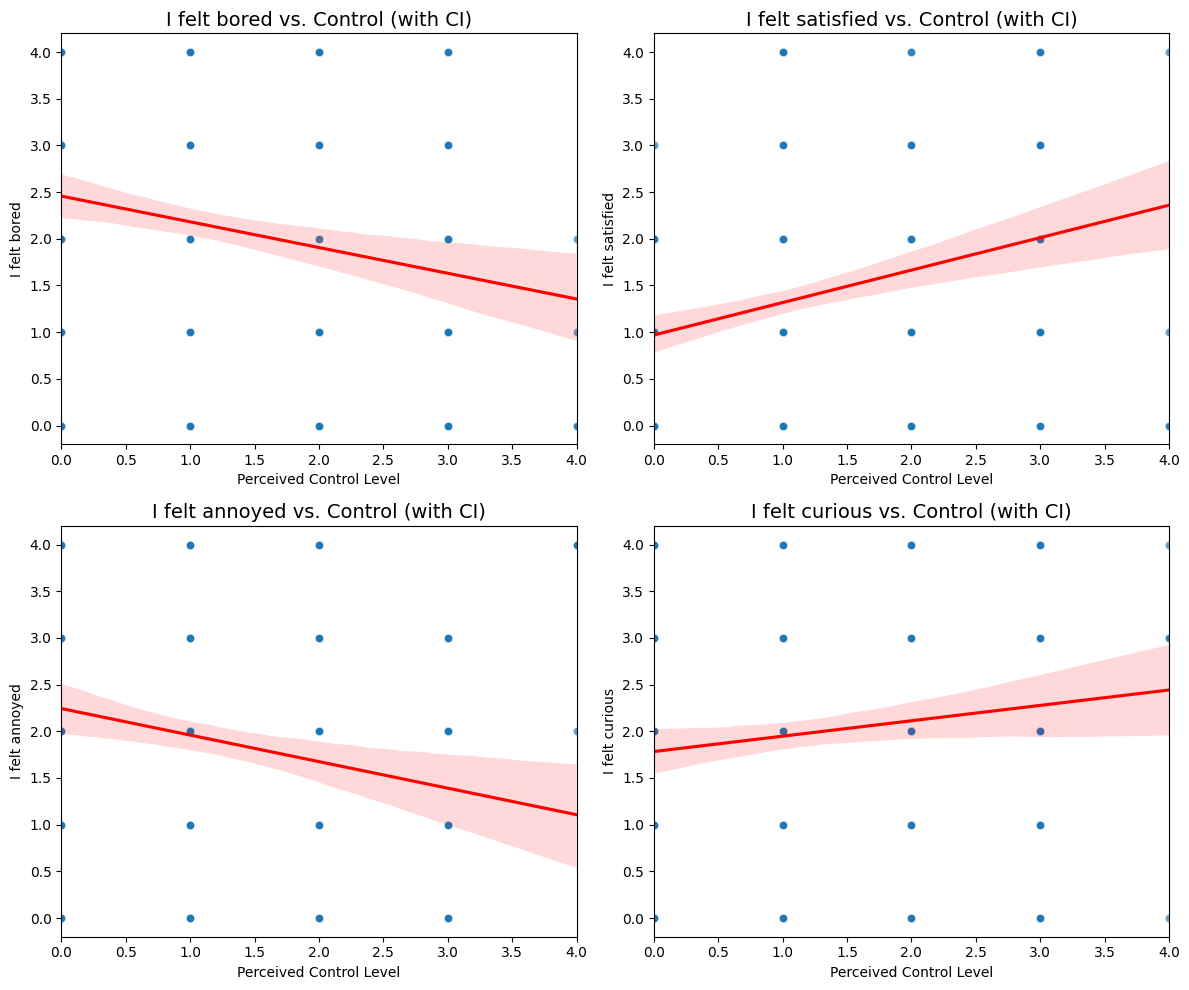

In [161]:
# Scatter plots with regression lines and confidence intervals for each emotion
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, emotion in enumerate(emotion_columns):
    sns.scatterplot(
        data=filtered_data,
        x=control_column,
        y=emotion,
        ax=axes[i],
        alpha=0.7,
        edgecolor='w'
    )
    sns.regplot(
        data=filtered_data,
        x=control_column,
        y=emotion,
        ax=axes[i],
        scatter=False,
        color='red',
        ci=95  # Confidence interval (95% by default)
    )
    axes[i].set_title(f"{emotion} vs. Control (with CI)", fontsize=14)
    axes[i].set_xlabel("Perceived Control Level")
    axes[i].set_ylabel(emotion)

plt.tight_layout()
plt.show()


In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate scatter plot with regression line and CI for a given emotion
def plot_emotion_vs_control(data, control_col, emotion_col):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=data,
        x=control_col,
        y=emotion_col,
        alpha=0.7,
        edgecolor='w',
        label='Data points'
    )
    sns.regplot(
        data=data,
        x=control_col,
        y=emotion_col,
        scatter=False,
        color='red',
        ci=95,
        label='Regression line (95% CI)'
    )
    plt.title(f"{emotion_col} vs. {control_col} (with Confidence Interval)", fontsize=16)
    plt.xlabel(control_col, fontsize=12)
    plt.ylabel(emotion_col, fontsize=12)
    plt.legend(loc="best", fontsize=10)
    plt.tight_layout()
    plt.show()

# Example usage
# plot_emotion_vs_control(filtered_data, control_column, "I felt bored")



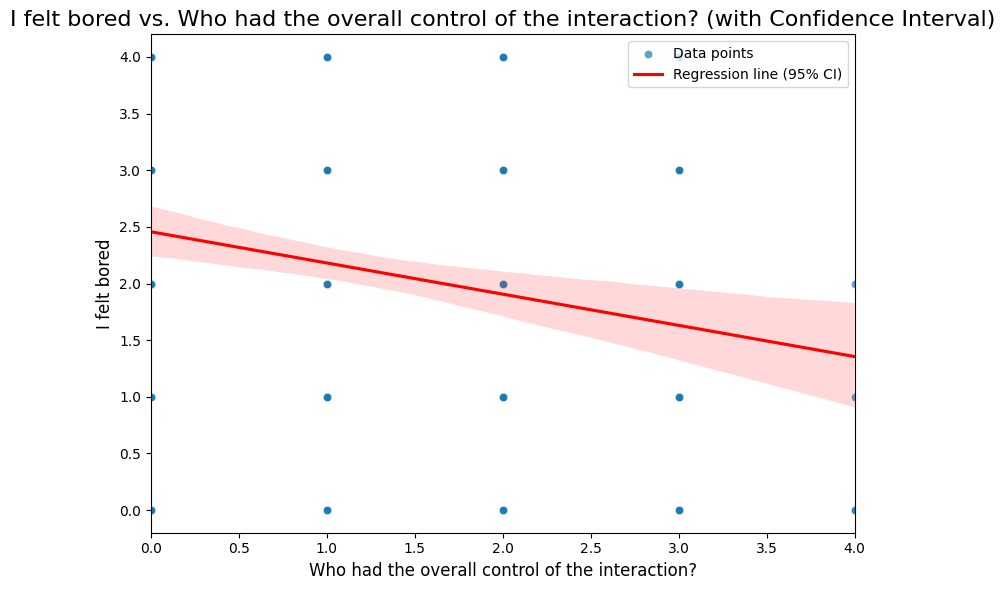

In [165]:
plot_emotion_vs_control(filtered_data, control_column, "I felt bored")



In [176]:
# Updated function to place the legend outside the plot and use a custom palette
def plot_emotion_vs_control(data, control_col, emotion_col, palette):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot with custom color palette
    scatter_color = sns.color_palette(palette, as_cmap=True)(0.3)  # Pick a color from the palette
    sns.scatterplot(
        data=data,
        x=control_col,
        y=emotion_col,
        alpha=0.7,
        edgecolor='w',
        color=scatter_color,
        label='Data points'
    )
    
    # Regression plot with custom color palette
    reg_color = sns.color_palette(palette, as_cmap=True)(0.7)  # Pick another color from the palette
    sns.regplot(
        data=data,
        x=control_col,
        y=emotion_col,
        scatter=False,
        color=reg_color,
        ci=95,
        label='Regression line (95% CI)'
    )
    
    # Customize plot
    plt.title(f"{emotion_col} vs. {control_col} (with Confidence Interval)", fontsize=16)
    plt.xlabel(control_col, fontsize=12)
    plt.ylabel(emotion_col, fontsize=12)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), fontsize=10, frameon=False)  # Legend outside
    plt.tight_layout()
    plt.show()



In [175]:
custom_palette = sns.cubehelix_palette(start=0.5, rot=-0.5, as_cmap=False)
plot_emotion_vs_control(filtered_data, control_column, "I felt bored", palette)

TypeError: object of type 'ListedColormap' has no len()

<Figure size 800x600 with 0 Axes>

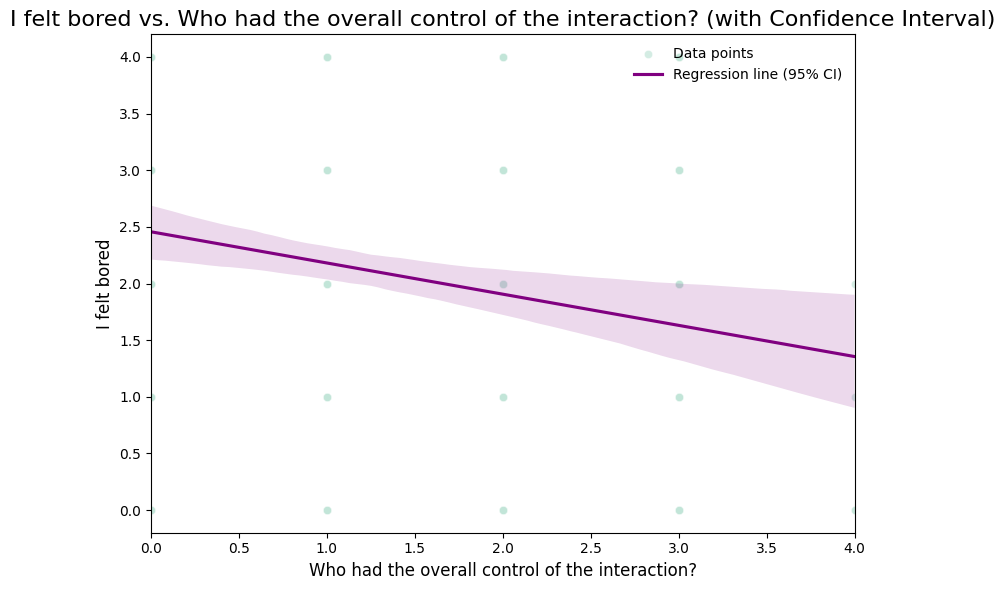

In [255]:
# Updated function to extend x and y limits to 5
def plot_emotion_vs_control(data, control_col, emotion_col, palette):
    plt.figure(figsize=(8, 6))
    
    # Generate a discrete palette from the colormap
    discrete_palette = sns.color_palette(palette, n_colors=3)
    scatter_color = discrete_palette[0]  # First color for scatter points
    reg_color = discrete_palette[1]  # Second color for regression line
    
    # Scatter plot
    sns.scatterplot(
        data=data,
        x=control_col,
        y=emotion_col,
        alpha=0.7,
        edgecolor='w',
        color=scatter_color,
        label='Data points'
    )
    
    # Regression plot
    sns.regplot(
        data=data,
        x=control_col,
        y=emotion_col,
        scatter=False,
  
        color="purple", 
        ci=95,
        label='Regression line (95% CI)'
    )
    
    # Customize plot
    plt.title(f"{emotion_col} vs. {control_col} (with Confidence Interval)", fontsize=16)
    plt.xlabel(control_col, fontsize=12)
    plt.ylabel(emotion_col, fontsize=12)

    plt.legend(loc="upper right", fontsize=10, frameon=False)  # Legend in the top right
    plt.tight_layout()
    plt.show()

# Example usage with custom palette
custom_palette = sns.cubehelix_palette(start=0.5, rot=-0.5, as_cmap=False)  # Discrete palette
plot_emotion_vs_control(filtered_data, control_column, "I felt bored", custom_palette)


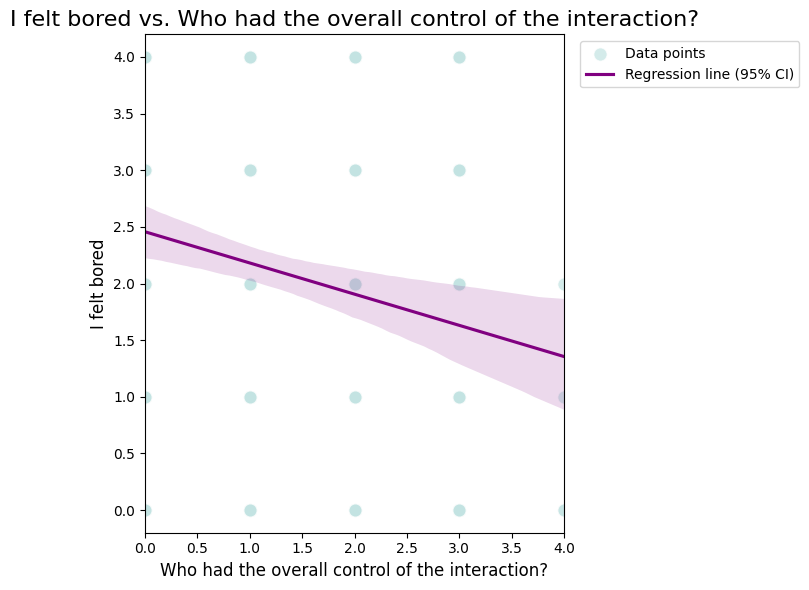

In [280]:
# Updated function to move the legend outside the plot
def plot_emotion_vs_control(data, control_col, emotion_col, palette):
    plt.figure(figsize=(8, 6))
    
    # Generate a discrete palette from the colormap
    discrete_palette = sns.color_palette(palette, n_colors=3)
    scatter_color = discrete_palette[0]  # First color for scatter points
    reg_color = discrete_palette[1]  # Second color for regression line
    
    # Scatter plot
    sns.scatterplot(
        data=data,
        x=control_col,
        y=emotion_col,
        alpha=0.7,
        edgecolor='w',

        s=90,
        color=scatter_color,
        label='Data points'
    )
    
    # Regression plot
    sns.regplot(
        data=data,
        x=control_col,
        y=emotion_col,
        scatter=False,
        color="purple",
        ci=95,
        label='Regression line (95% CI)'
    )
    
    # Customize plot
    plt.title(f"{emotion_col} vs. {control_col}", fontsize=16)
    plt.xlabel(control_col, fontsize=12)
    plt.ylabel(emotion_col, fontsize=12)
    

    plt.legend(loc="upper center", bbox_to_anchor=(1.3, 1.0), fontsize=10, frameon=True)  # Legend outside
    plt.tight_layout()
    
    plt.savefig(f'Figures/Control-vs-{emotion_col}.png', transparent=True)

    plt.show()

# Example usage with custom palette
custom_palette = sns.cubehelix_palette(start=0.7, rot=-0.5, as_cmap=False)  # Discrete palette
plot_emotion_vs_control(filtered_data, control_column, "I felt bored", custom_palette)


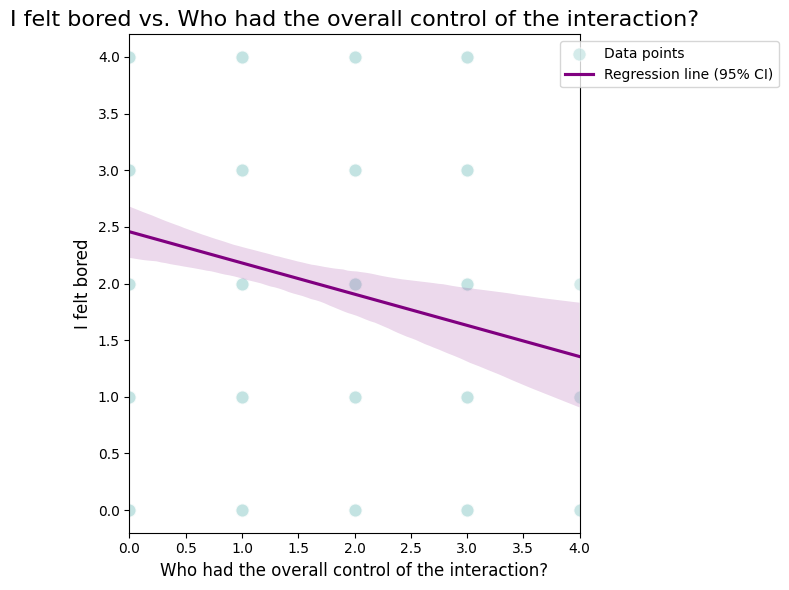

In [281]:
# Updated function to prevent plot shrinking when legend is outside
def plot_emotion_vs_control(data, control_col, emotion_col, palette):
    # Adjust figure size to allow space for the legend
    plt.figure(figsize=(10, 6))  # Increase width to prevent narrowing
    
    # Generate a discrete palette from the colormap
    discrete_palette = sns.color_palette(palette, n_colors=3)
    scatter_color = discrete_palette[0]  # First color for scatter points
    reg_color = discrete_palette[1]  # Second color for regression line
    
    # Scatter plot
    sns.scatterplot(
        data=data,
        x=control_col,
        y=emotion_col,
        alpha=0.7,
        edgecolor='w',
        s=90,
        color=scatter_color,
        label='Data points'
    )
    
    # Regression plot
    sns.regplot(
        data=data,
        x=control_col,
        y=emotion_col,
        scatter=False,
        color="purple",
        ci=95,
        label='Regression line (95% CI)'
    )
    
    # Customize plot
    plt.title(f"{emotion_col} vs. {control_col}", fontsize=16)
    plt.xlabel(control_col, fontsize=12)
    plt.ylabel(emotion_col, fontsize=12)
    
    # Legend outside with adjusted position
    plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1.0), fontsize=10, frameon=True)  
    
    # Adjust tight_layout to account for legend
    plt.tight_layout(rect=[0, 0, 0.8, 1])  # Shrink main plot slightly to the left for legend
    
    # Save plot
    plt.savefig(f'Figures/Control-vs-{emotion_col}.png', transparent=True)

    # Show plot
    plt.show()

# Example usage with custom palette
custom_palette = sns.cubehelix_palette(start=0.7, rot=-0.5, as_cmap=False)  # Discrete palette
plot_emotion_vs_control(filtered_data, control_column, "I felt bored", custom_palette)


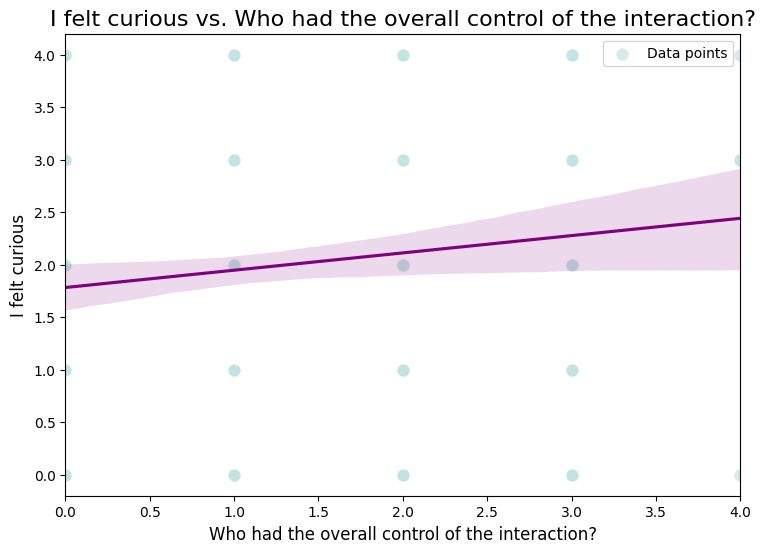

In [317]:
# Updated function to avoid plot shrinking with external legend
def plot_emotion_vs_control(data, control_col, emotion_col, palette):
    # Increase figure size for more space
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Generate a discrete palette from the colormap
    discrete_palette = sns.color_palette(palette, n_colors=3)
    scatter_color = discrete_palette[0]  # First color for scatter points
    reg_color = discrete_palette[1]  # Second color for regression line
    
    # Scatter plot
    sns.scatterplot(
        data=data,
        x=control_col,
        y=emotion_col,
        alpha=0.7,
        edgecolor='w',
        s=90,
        color=scatter_color,
        label='Data points',
        ax=ax
    )
    
    # Regression plot
    sns.regplot(
        data=data,
        x=control_col,
        y=emotion_col,
        scatter=False,
        color="purple",
        ci=95,
        label='Regression line',
        ax=ax
    )
    
    # Customize plot
    ax.set_title(f"{emotion_col} vs. {control_col}", fontsize=16)
    ax.set_xlabel(control_col, fontsize=12)
    ax.set_ylabel(emotion_col, fontsize=12)
    
     # Create the legend as a separate figure
    
    #legend_fig.savefig(f'Figures/Control-vs-{emotion_col}-legend.png', transparent=True)
    
    
    # Place legend outside the plot
    #ax.legend(loc="upper center", bbox_to_anchor=(0.88, 0.94), fontsize=10, frameon=True)
    # Adjust subplot to make space for the legend
    fig.subplots_adjust(right=0.8)  # Adjust right margin to make space for the legend
    
    # Save plot
    plt.savefig(f'Figures/Control-vs-{emotion_col}.png', transparent=True)
    
    # Show plot
    plt.show()

# Example usage with custom palette
custom_palette = sns.cubehelix_palette(start=0.7, rot=-0.5, as_cmap=False)  # Discrete palette
plot_emotion_vs_control(filtered_data, control_column, "I felt curious", custom_palette)


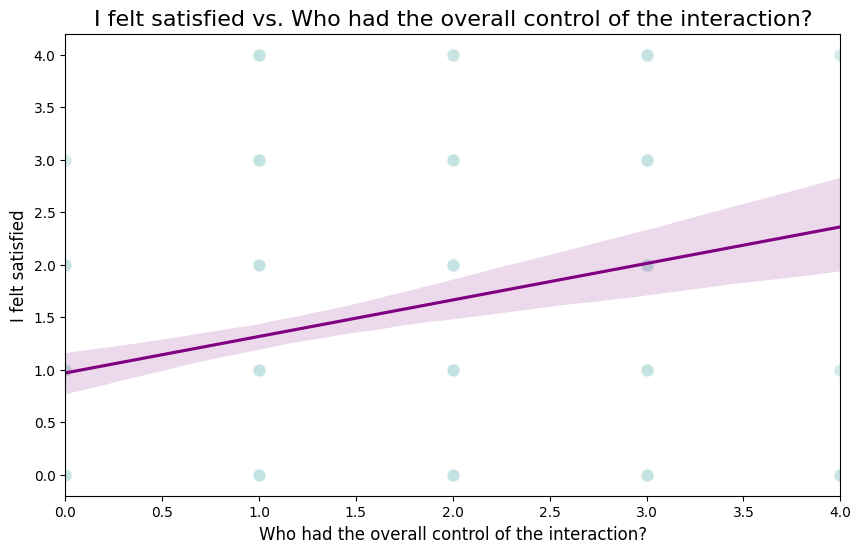

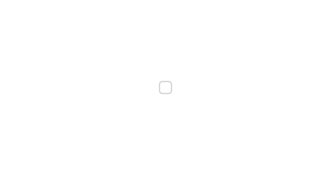

In [ ]:
# Updated function to completely remove the legend
def plot_emotion_vs_control_no_legend(data, control_col, emotion_col, palette):
    # Increase figure size
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Generate a discrete palette from the colormap
    discrete_palette = sns.color_palette(palette, n_colors=3)
    scatter_color = discrete_palette[0]  # First color for scatter points
    reg_color = discrete_palette[1]  # Second color for regression line
    
    # Scatter plot (no label)
    sns.scatterplot(
        data=data,
        x=control_col,
        y=emotion_col,
        alpha=0.7,
        edgecolor='w',
        s=90,
        color=scatter_color,
        ax=ax
    )
    
    # Regression plot (no label)
    sns.regplot(
        data=data,
        x=control_col,
        y=emotion_col,
        scatter=False,
        color="purple",
        ci=95,
        ax=ax
    )
    
    
    # Customize plot
    ax.set_title(f"{emotion_col} vs. {control_col}", fontsize=16)
    ax.set_xlabel(control_col, fontsize=12)
    ax.set_ylabel(emotion_col, fontsize=12)
 
 
    
    # Save the plot
    plt.savefig(f'Figures/Control-vs-{emotion_col}.png', transparent=True)
    plt.show()

# Example usage with custom palette
custom_palette = sns.cubehelix_palette(start=0.7, rot=-0.5, as_cmap=False)  # Discrete palette
plot_emotion_vs_control_no_legend(filtered_data, control_column, "I felt satisfied", custom_palette)


In [327]:
import statsmodels.api as sm
import numpy as np

# Function to calculate and display confidence intervals for a regression
def calculate_confidence_intervals(df, x_col, y_col, ci=0.95):
    # Add a constant for the intercept term
    X = sm.add_constant(df[x_col])
    y = df[y_col]
    
    # Fit the model
    model = sm.OLS(y, X).fit()
    
    # Get the confidence intervals
    ci_values = model.conf_int(alpha=1-ci)
    slope = model.params[x_col]
    intercept = model.params['const']
    
    return {
        "Slope": slope,
        "Intercept": intercept,
        "Slope CI": ci_values.loc[x_col].tolist(),
        "Intercept CI": ci_values.loc['const'].tolist(),
        "R-squared": model.rsquared
    }

# Calculate confidence intervals for each emotion
results = {}
for emotion in emotion_columns:
    results[emotion] = calculate_confidence_intervals(filtered_data, control_column, emotion)

# Convert results to a DataFrame for display
ci_df = pd.DataFrame.from_dict(results, orient='index')

ci_df

,Slope,Intercept,Slope CI,Intercept CI,R-squared
I felt bored,-0.275452,2.457102,"[-0.4336924252537354, -0.11721069461490141]","[2.2232364473743944, 2.690967165105074]",0.037400
I felt satisfied,0.347701,0.969109,"[0.20805079764420056, 0.4873515012063747]","[0.7627188955955434, 1.1754994952090543]",0.073635
I felt annoyed,-0.284278,2.243637,"[-0.44846038039512093, -0.12009462781505909]","[2.000990008677544, 2.4862842113552928]",0.037019
I felt curious,0.164819,1.782841,"[0.010403965288040468, 0.31923478676450534]","[1.5546290315793854, 2.011052413412402]",0.014398


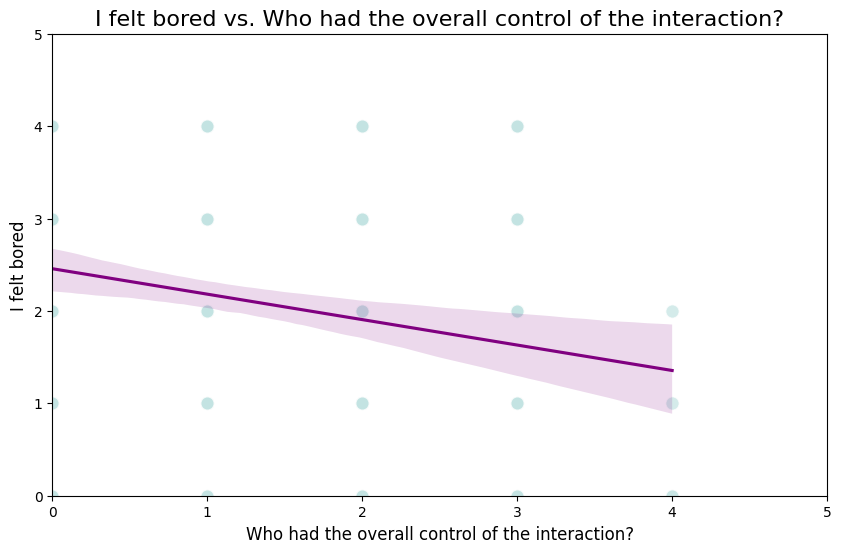

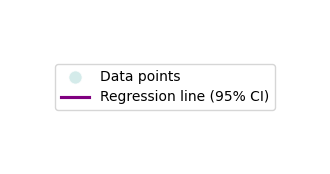

In [328]:
# Updated function to save the legend as its own PNG file
def plot_emotion_vs_control(data, control_col, emotion_col, palette):
    # Increase figure size
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Generate a discrete palette from the colormap
    discrete_palette = sns.color_palette(palette, n_colors=3)
    scatter_color = discrete_palette[0]  # First color for scatter points
    reg_color = discrete_palette[1]  # Second color for regression line
    
    # Scatter plot
    sns.scatterplot(
        data=data,
        x=control_col,
        y=emotion_col,
        alpha=0.7,
        edgecolor='w',
        s=90,
        color=scatter_color,
        label='Data points',
        ax=ax
    )
    
    # Regression plot
    sns.regplot(
        data=data,
        x=control_col,
        y=emotion_col,
        scatter=False,
        color="purple",
        ci=95,
        label='Regression line (95% CI)',
        ax=ax
    )
    
    # Customize plot
    ax.set_title(f"{emotion_col} vs. {control_col}", fontsize=16)
    ax.set_xlabel(control_col, fontsize=12)
    ax.set_ylabel(emotion_col, fontsize=12)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    
    # Create the legend as a separate figure
    legend_fig = plt.figure(figsize=(4, 2))
    legend_ax = legend_fig.add_subplot(111)
    handles, labels = ax.get_legend_handles_labels()
    legend_ax.legend(handles, labels, loc='center', frameon=True)
    legend_ax.axis('off')  # Turn off the axes for the legend figure
    legend_fig.savefig(f'LEGEND.png', transparent=True)
    
    # Remove the legend from the main plot and save
    ax.legend_.remove()
    plt.savefig(f'Figures/Control-vs-{emotion_col}.png', transparent=True)
    plt.show()

# Example usage with custom palette
custom_palette = sns.cubehelix_palette(start=0.7, rot=-0.5, as_cmap=False)  # Discrete palette
plot_emotion_vs_control(filtered_data, control_column, "I felt bored", custom_palette)


In [329]:
import pandas as pd
from scipy.stats import spearmanr

def perform_spearman(dataset, control_column, emotion_columns):
    """
    Perform Spearman correlation between a control variable and a list of emotion variables.

    Parameters:
    - dataset (DataFrame): The dataset containing the control and emotion columns.
    - control_column (str): The name of the control variable column.
    - emotion_columns (list): A list of emotion variable column names.

    Returns:
    - DataFrame: A DataFrame with Spearman correlation results for each emotion.
    """
    # Initialize a list to store the results
    spearman_results = []

    # Loop through each emotion and calculate Spearman correlation
    for emotion in emotion_columns:
        rho, p_value = spearmanr(dataset[control_column], dataset[emotion])
        spearman_results.append({
            "Emotion": emotion,
            "Spearman Correlation": rho,
            "P-Value": p_value
        })

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(spearman_results)
    return results_df


In [330]:
# Assuming 'data' is your DataFrame
emotion_columns = ["I felt bored", "I felt satisfied", "I felt annoyed", "I felt curious"]
control_column = "Who had the overall control of the interaction?"

# Perform Spearman correlation
spearman_results = perform_spearman(filtered_data, control_column, emotion_columns)

# Print the results
print(spearman_results)


            Emotion  Spearman Correlation       P-Value
0      I felt bored             -0.187657  1.010163e-03
1  I felt satisfied              0.313409  2.360660e-08
2    I felt annoyed             -0.235134  3.457581e-05
3    I felt curious              0.117860  4.000953e-02


In [364]:
def plot_lowess_with_ci_styled(data, control_col, emotion_col, palette, n_bootstraps=1000, alpha=0.05):
    """
    Plot LOWESS with confidence intervals, styled for presentation.

    Parameters:
    - data (DataFrame): The dataset containing the control and emotion columns.
    - control_col (str): The name of the control variable column.
    - emotion_col (str): The name of the emotion column.
    - palette (list): A palette for coloring the plot elements.
    - n_bootstraps (int): Number of bootstrap samples for confidence intervals.
    - alpha (float): Significance level for confidence intervals (e.g., 0.05 for 95% CI).
    """
    # Prepare the figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Extract the data
    X = data[control_col]
    y = data[emotion_col]
    
    # Fit the main LOWESS curve
    lowess = sm.nonparametric.lowess
    main_curve = lowess(y, X, frac=0.5)
    
    # Bootstrapping to calculate confidence intervals
    bootstrapped_curves = []
    for _ in range(n_bootstraps):
        sample_indices = np.random.choice(len(X), size=len(X), replace=True)
        X_sample = X.iloc[sample_indices]
        y_sample = y.iloc[sample_indices]
        smoothed_sample = lowess(y_sample, X_sample, frac=0.5)
        bootstrapped_curves.append(np.interp(main_curve[:, 0], smoothed_sample[:, 0], smoothed_sample[:, 1]))
    
    # Calculate confidence intervals
    bootstrapped_curves = np.array(bootstrapped_curves)
    lower_bound = np.percentile(bootstrapped_curves, 100 * (alpha / 2), axis=0)
    upper_bound = np.percentile(bootstrapped_curves, 100 * (1 - alpha / 2), axis=0)
    
    # Generate a discrete palette from the colormap
    discrete_palette = sns.color_palette(palette, n_colors=3)
    scatter_color = discrete_palette[0]  # First color for scatter points
    lowess_color = discrete_palette[1]  # Second color for LOWESS curve
    
    # Scatter plot
    sns.scatterplot(
        x=X, y=y, alpha=0.7, edgecolor="w", s=90, color=scatter_color, label="Data points", ax=ax
    )
    
    # Plot the LOWESS curve
    ax.plot(main_curve[:, 0], main_curve[:, 1], color="purple", label="LOWESS Curve")
    
    # Add confidence intervals
    ax.fill_between(main_curve[:, 0], lower_bound, upper_bound, color="purple", alpha=0.05, label="95% CI")
    
    # Customize plot
    ax.set_title(f"LOWESS: {emotion_col} vs. Percieved Control", fontsize=16)
    ax.set_xlabel(control_col, fontsize=12)
    ax.set_ylabel(emotion_col, fontsize=12)
    
    # Place the legend outside the plot
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10, frameon=True)
    fig.subplots_adjust(right=0.8)  # Adjust right margin to make space for the legend
    
    # Save plot
    #plt.savefig(f'Figures/LOWESS-{emotion_col}.png', transparent=True)
    
    # Show plot
    plt.show()


C:\Users\elmir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


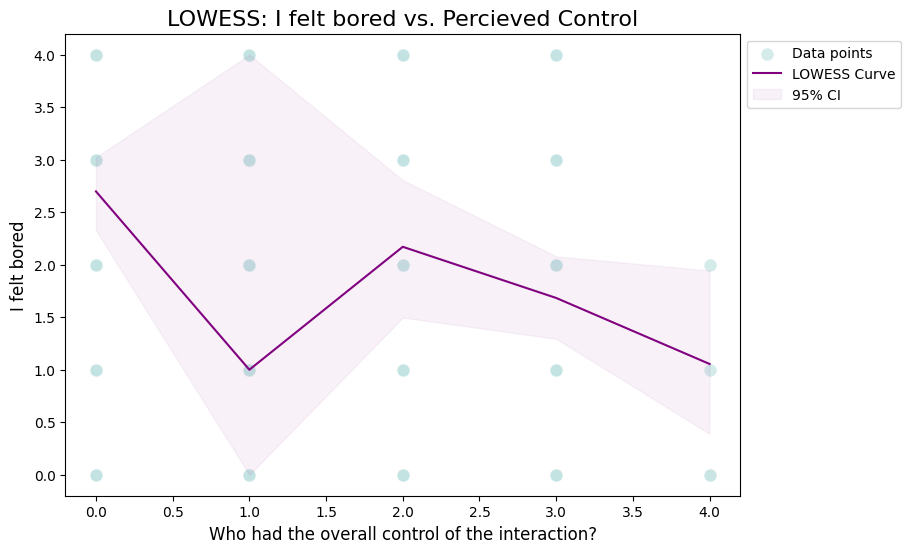

C:\Users\elmir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


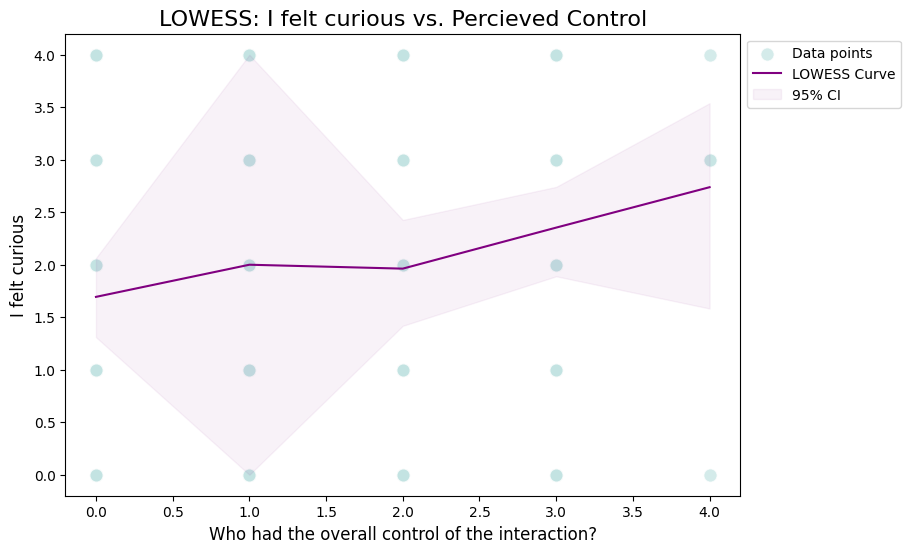

C:\Users\elmir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


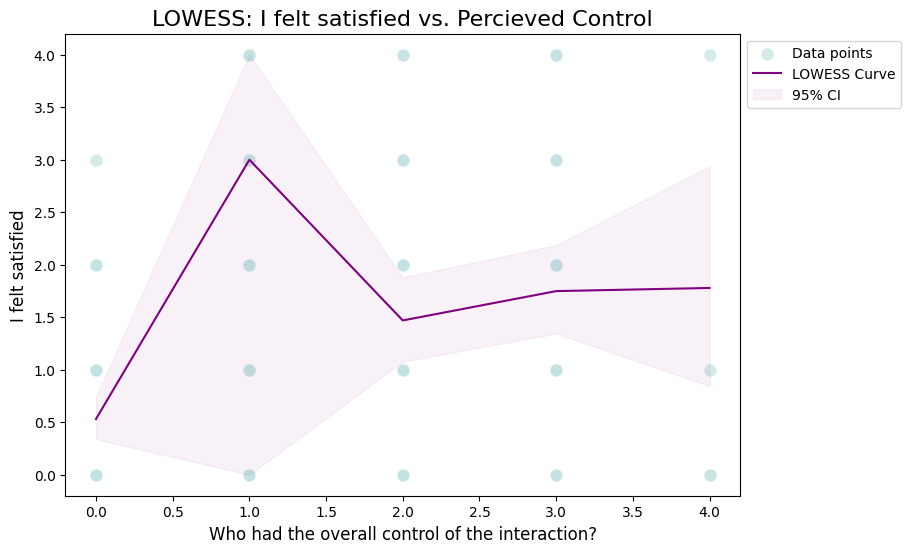

C:\Users\elmir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


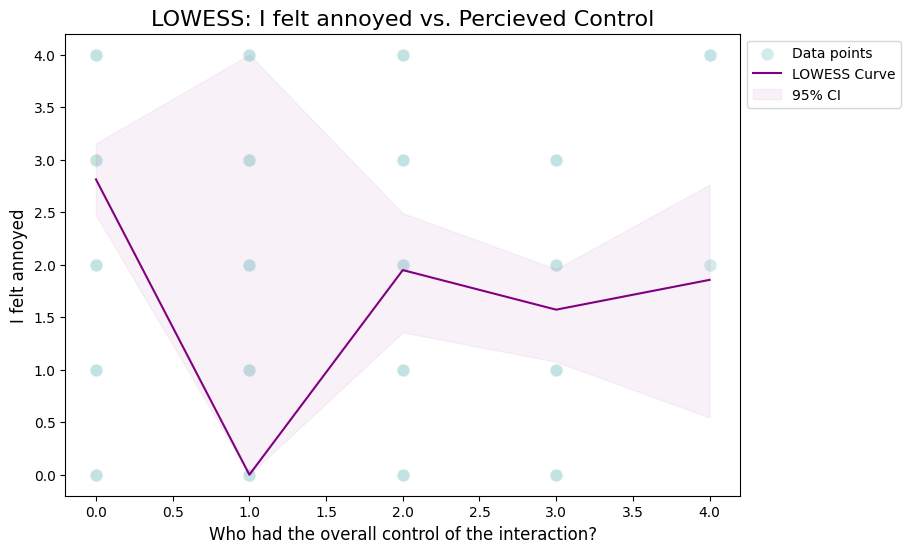

In [365]:

# Example usage with custom palette
custom_palette = sns.cubehelix_palette(start=0.7, rot=-0.5, as_cmap=False)  # Discrete palette
plot_lowess_with_ci_styled(filtered_data, control_column, "I felt bored", custom_palette)
plot_lowess_with_ci_styled(filtered_data, control_column, "I felt curious", custom_palette)
plot_lowess_with_ci_styled(filtered_data, control_column, "I felt satisfied", custom_palette)
plot_lowess_with_ci_styled(filtered_data, control_column, "I felt annoyed", custom_palette)

In [386]:
# Step 1: Data Preprocessing
# Group AI Usage into "Low Usage" and "High Usage"
# Import necessary libraries
import pandas as pd
from scipy.stats import f_oneway


data['AI Usage Group'] = data['How often do you use AI tools for creativity (e.g., writing, coding, music, fine arts, food recipes, etc.)?'].replace(
    {0: 'Low Usage', 1: 'Low Usage', 2: 'Low Usage', 3: 'High Usage', 4: 'High Usage'}
)

# Convert the dependent variable ("Who had the overall control of the interaction?") to numeric
data['Who had the overall control of the interaction?'] = pd.to_numeric(
    data['Who had the overall control of the interaction?'], errors='coerce'
)

# Step 2: Filter Relevant Data
# Select only rows with non-missing values for both columns
anova_data = data[['AI Usage Group', 'Who had the overall control of the interaction?', 'Participant ID']].dropna()

# Step 3: Group Data for ANOVA
# Extract dependent variable values for each group
low_usage_control = anova_data[anova_data['AI Usage Group'] == 'Low Usage']['Who had the overall control of the interaction?']
high_usage_control = anova_data[anova_data['AI Usage Group'] == 'High Usage']['Who had the overall control of the interaction?']

# Step 4: Perform One-Way ANOVA
anova_result = f_oneway(low_usage_control, high_usage_control)

# Step 5: Display Results
print("ANOVA Results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

# Step 6: Interpretation
if anova_result.pvalue < 0.05:
    print("The results are statistically significant. There is a difference in perceived control between the AI usage groups.")
else:
    print("The results are not statistically significant. No difference in perceived control between the AI usage groups.")

ANOVA Results:
F-statistic: 13.20101270753201
P-value: 0.00032869883088721503
The results are statistically significant. There is a difference in perceived control between the AI usage groups.


In [394]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 7: Prepare Data for Tukey's Test
# The Tukey test requires a single dependent variable and group labels
anova_data_clean = anova_data[['AI Usage Group', 'Who had the overall control of the interaction?']].dropna()

# Step 8: Perform Tukey's HSD Test
tukey = pairwise_tukeyhsd(
    endog=anova_data_clean['Who had the overall control of the interaction?'],  # Dependent variable
    groups=anova_data_clean['AI Usage Group'],  # Grouping variable
    alpha=0.05  # Significance level
)

# Step 9: Display Tukey's Test Results
print("Tukey HSD Test Results:")
print(tukey)
print("- Participants in the High Usage group (frequent AI tool users) reported a significantly higher sense of control during the interaction compared to those in the Low Usage group (infrequent or non-users).")
print("- The mean difference of 0.3807 suggests that frequent AI tool users feel moderately more in control, and this difference is statistically significant with a high level of confidence.")

Tukey HSD Test Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2  meandiff p-adj  lower  upper  reject
---------------------------------------------------------
High Usage Low Usage   0.3807 0.0003 0.1745 0.5869   True
---------------------------------------------------------
- Participants in the High Usage group (frequent AI tool users) reported a significantly higher sense of control during the interaction compared to those in the Low Usage group (infrequent or non-users).
- The mean difference of 0.3807 suggests that frequent AI tool users feel moderately more in control, and this difference is statistically significant with a high level of confidence.


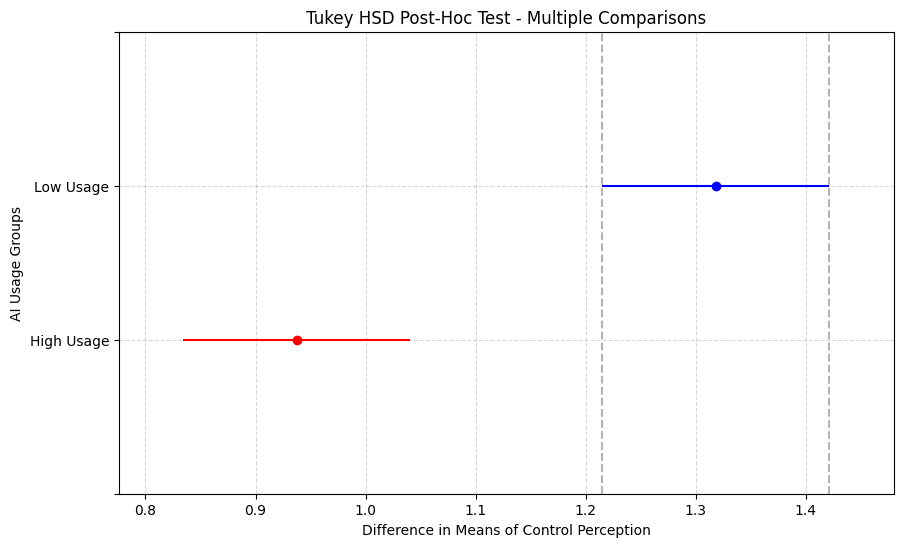

In [391]:
# Import necessary library for plotting
import matplotlib.pyplot as plt

# Step 10: Visualize Tukey's HSD Results
# Tukey HSD results contain the data needed to create this plot
fig = tukey.plot_simultaneous(
    comparison_name="Low Usage",  # Reference group for comparisons
    xlabel="Difference in Means of Control Perception",
    ylabel="AI Usage Groups"
)

# Customize the plot (optional)
plt.title("Tukey HSD Post-Hoc Test - Multiple Comparisons")
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


Interpretation of the Tukey HSD Post-Hoc Test Plot:
Horizontal Lines (Confidence Intervals):

Each horizontal line represents the confidence interval (CI) for the difference in means between the groups.
If a confidence interval does not cross the vertical line at 0 (no difference), it means the difference between the two groups is statistically significant.
Groups:

The groups are shown on the y-axis (e.g., "Low Usage" and "High Usage").
Each dot represents the mean difference between the groups for the dependent variable (perceived control).
Key Observations:

The High Usage group has a CI entirely above 0, meaning the perceived control for this group is significantly higher compared to the reference group (Low Usage).
The Low Usage group also shows its mean difference, but this plot focuses on the difference relative to the other group.
Significance:

Since the confidence interval does not overlap with zero, it confirms that the High Usage group reports significantly higher perceived control than the Low Usage group.
This aligns with the Tukey test results, showing a statistically significant difference.
Practical Implication:

Participants who frequently use AI tools (High Usage) feel more in control of the interaction compared to those who rarely or never use such tools (Low Usage).

In [390]:
# Import necessary libraries
import pandas as pd


# Step 1: Before Grouping - Count the Frequency of AI Usage and Unique Participants
original_ai_usage_counts = data['How often do you use AI tools for creativity (e.g., writing, coding, music, fine arts, food recipes, etc.)?'].value_counts()

original_participant_counts = data.groupby(
    'How often do you use AI tools for creativity (e.g., writing, coding, music, fine arts, food recipes, etc.)?'
)['Participant ID'].nunique()

# Step 2: Group AI Usage into "Low Usage" and "High Usage"
data['AI Usage Group'] = data['How often do you use AI tools for creativity (e.g., writing, coding, music, fine arts, food recipes, etc.)?'].replace(
    {0: 'Low Usage', 1: 'Low Usage', 2: 'Low Usage', 3: 'High Usage', 4: 'High Usage'}
)

# Step 3: After Grouping - Count the Frequency of Grouped AI Usage and Unique Participants
grouped_ai_usage_counts = data['AI Usage Group'].value_counts()

grouped_participant_counts = data.groupby('AI Usage Group')['Participant ID'].nunique()

# Step 4: Display Results
print("Before Grouping - Frequency of AI Usage:")
print(original_ai_usage_counts)

print("\nBefore Grouping - Unique Participants by AI Usage:")
print(original_participant_counts)

print("\nAfter Grouping - Frequency of Grouped AI Usage:")
print(grouped_ai_usage_counts)

print("\nAfter Grouping - Unique Participants by Grouped AI Usage:")
print(grouped_participant_counts)


Before Grouping - Frequency of AI Usage:
How often do you use AI tools for creativity (e.g., writing, coding, music, fine arts, food recipes, etc.)?
3    88
2    72
1    56
0    48
4    40
Name: count, dtype: int64

Before Grouping - Unique Participants by AI Usage:
How often do you use AI tools for creativity (e.g., writing, coding, music, fine arts, food recipes, etc.)?
0    12
1    14
2    18
3    22
4    10
Name: Participant ID, dtype: int64

After Grouping - Frequency of Grouped AI Usage:
AI Usage Group
Low Usage     176
High Usage    128
Name: count, dtype: int64

After Grouping - Unique Participants by Grouped AI Usage:
AI Usage Group
High Usage    32
Low Usage     44
Name: Participant ID, dtype: int64
